# THIS IS THE FINAL NOTEBOOK THAT MAKES ALL PLOTS USED IN THE PAPER --> data are stored on Vollmond

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import os 
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
from statistics import mode
from matplotlib import cm
from iteration_utilities import flatten
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker

In [2]:
save_plot = True

plot_dir = 'plots/FINAL/'
os.system('mkdir -p {}'.format(plot_dir))

colors = {
    'brems': cm.tab10(0),
    'nuclint': cm.tab10(1), 
    'epair': cm.tab10(2),
    'ioniz': cm.tab10(3) 
}


### Paper style

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "font.family": "serif",
#     "font.serif": "Times",
    'axes.labelsize': 12,
    "legend.fontsize":11,
    "font.sans-serif": ["Helvetica"],
#    "text.latex.preamble": [r'"\usepackage{amsmath}"'],
})


## Deflection per interaction plot

In [ ]:
# Read data
# save deflections of each interaction type for final paper notebook, using van Ginneken

brems_defl_vG_ex = list(flatten(pd.read_hdf('plots/deflection_along_sampling/' + 'FINAL_defl_along_sampling_1PeV_1TeV_1000events.hdf5', key='brems_defl_vG_ex').values))
nuclint_defl_vG_ex = list(flatten(pd.read_hdf('plots/deflection_along_sampling/' + 'FINAL_defl_along_sampling_1PeV_1TeV_1000events.hdf5', key='nuclint_defl_vG_ex').values))
epair_defl_default_ex = list(flatten(pd.read_hdf('plots/deflection_along_sampling/' + 'FINAL_defl_along_sampling_1PeV_1TeV_1000events.hdf5', key='epair_defl_default_ex').values))
ioniz_defl_default_ex = list(flatten(pd.read_hdf('plots/deflection_along_sampling/' + 'FINAL_defl_along_sampling_1PeV_1TeV_1000events.hdf5', key='ioniz_defl_default_ex').values))

df_moliere = pd.read_hdf('plots/deflection_along_sampling/' + 'FINAL_defl_along_sampling_1PeV_1TeV_1000events.hdf5', key='cont_moliere')
df_highland = pd.read_hdf('plots/deflection_along_sampling/' + 'FINAL_defl_along_sampling_1PeV_1TeV_1000events.hdf5', key='cont_highland')

In [ ]:
bins = np.logspace(-9, 1, 61)

plt.hist(np.rad2deg(brems_defl_vG_ex), bins=bins, histtype='step', color=colors['brems'], label='Brems')
plt.hist(np.rad2deg(nuclint_defl_vG_ex), bins=bins, histtype='step', color=colors['nuclint'], label='Nuclint')
plt.hist(np.rad2deg(epair_defl_default_ex), bins=bins, histtype='step', color=colors['epair'], label='Epair')
plt.hist(np.rad2deg(ioniz_defl_default_ex), bins=bins, histtype='step', color=colors['ioniz'], label='Ioniz')

plt.hist(np.rad2deg(df_moliere.cont_moliere), bins=bins, histtype='step', color='pink', label='Molière')
plt.hist(np.rad2deg(df_highland.cont_highland), bins=bins, histtype='step', color='gray', label='Highland')



# total with moliere
total_defl_vG_cont = list(flatten([brems_defl_vG_ex, nuclint_defl_vG_ex, epair_defl_default_ex, ioniz_defl_default_ex, df_moliere.cont_moliere]))
plt.hist(np.rad2deg(total_defl_vG_cont), bins=bins, histtype='step', color='black', label='Total')

total_defl_vG = list(flatten([brems_defl_vG_ex, nuclint_defl_vG_ex, epair_defl_default_ex, ioniz_defl_default_ex])) 

print('median brems: ', np.median(np.rad2deg(brems_defl_vG_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(brems_defl_vG_ex), 0.025), np.quantile(np.rad2deg(brems_defl_vG_ex), 0.975)))
print('median nuclint: ', np.median(np.rad2deg(nuclint_defl_vG_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(nuclint_defl_vG_ex), 0.025), np.quantile(np.rad2deg(nuclint_defl_vG_ex), 0.975)))
print('median epair: ', np.median(np.rad2deg(epair_defl_default_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(epair_defl_default_ex), 0.025), np.quantile(np.rad2deg(epair_defl_default_ex), 0.975)))
print('median ioniz: ', np.median(np.rad2deg(ioniz_defl_default_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(ioniz_defl_default_ex), 0.025), np.quantile(np.rad2deg(ioniz_defl_default_ex), 0.975)))
print('median total: ', np.median(np.rad2deg(total_defl_vG)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(total_defl_vG), 0.025), np.quantile(np.rad2deg(total_defl_vG), 0.975)))
print('median total cont: ', np.median(np.rad2deg(total_defl_vG_cont)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(total_defl_vG_cont), 0.025), np.quantile(np.rad2deg(total_defl_vG_cont), 0.975)))
print('median moliere: ', np.median(np.rad2deg(df_moliere.cont_moliere)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(df_moliere.cont_moliere), 0.025), np.quantile(np.rad2deg(df_moliere.cont_moliere), 0.975)))
print('median highland: ', np.median(np.rad2deg(df_highland.cont_highland)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(df_highland.cont_highland), 0.025), np.quantile(np.rad2deg(df_highland.cont_highland), 0.975)))

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$°')
plt.ylabel('Counts')
plt.legend(loc='upper right')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_1TeV_1000events_deflection_along_sampling.pdf')

# ratio of zeros
print('ratio of zeros (extern): ', np.sum(np.array(total_defl_vG)==0)/len(total_defl_vG))

In [ ]:
bins = np.logspace(-9, 1, 61)

fig, ax = plt.subplots()

ax.hist(np.rad2deg(brems_defl_vG_ex), bins=bins, histtype='step', color=colors['brems'], label='Brems')
ax.hist(np.rad2deg(nuclint_defl_vG_ex), bins=bins, histtype='step', color=colors['nuclint'], label='Nuclint')
ax.hist(np.rad2deg(epair_defl_default_ex), bins=bins, histtype='step', color=colors['epair'], label='Epair')
ax.hist(np.rad2deg(ioniz_defl_default_ex), bins=bins, histtype='step', color=colors['ioniz'], label='Ioniz')

ax.hist(np.rad2deg(df_moliere.cont_moliere), bins=bins, histtype='step', color='pink', label='MSM')
ax.hist(np.rad2deg(df_highland.cont_highland), bins=bins, histtype='step', color='gray', label='MSH')



# total with moliere
total_defl_vG_cont = list(flatten([brems_defl_vG_ex, nuclint_defl_vG_ex, epair_defl_default_ex, ioniz_defl_default_ex, df_moliere.cont_moliere]))
ax.hist(np.rad2deg(total_defl_vG_cont), bins=bins, histtype='step', color='black', label='Total')

total_defl_vG = list(flatten([brems_defl_vG_ex, nuclint_defl_vG_ex, epair_defl_default_ex, ioniz_defl_default_ex])) 

print('median brems: ', np.median(np.rad2deg(brems_defl_vG_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(brems_defl_vG_ex), 0.025), np.quantile(np.rad2deg(brems_defl_vG_ex), 0.975)))
print('median nuclint: ', np.median(np.rad2deg(nuclint_defl_vG_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(nuclint_defl_vG_ex), 0.025), np.quantile(np.rad2deg(nuclint_defl_vG_ex), 0.975)))
print('median epair: ', np.median(np.rad2deg(epair_defl_default_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(epair_defl_default_ex), 0.025), np.quantile(np.rad2deg(epair_defl_default_ex), 0.975)))
print('median ioniz: ', np.median(np.rad2deg(ioniz_defl_default_ex)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(ioniz_defl_default_ex), 0.025), np.quantile(np.rad2deg(ioniz_defl_default_ex), 0.975)))
print('median total: ', np.median(np.rad2deg(total_defl_vG)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(total_defl_vG), 0.025), np.quantile(np.rad2deg(total_defl_vG), 0.975)))
print('median total cont: ', np.median(np.rad2deg(total_defl_vG_cont)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(total_defl_vG_cont), 0.025), np.quantile(np.rad2deg(total_defl_vG_cont), 0.975)))
print('median moliere: ', np.median(np.rad2deg(df_moliere.cont_moliere)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(df_moliere.cont_moliere), 0.025), np.quantile(np.rad2deg(df_moliere.cont_moliere), 0.975)))
print('median highland: ', np.median(np.rad2deg(df_highland.cont_highland)), ', low 95%: {}, high 95: {}'.format(np.quantile(np.rad2deg(df_highland.cont_highland), 0.025), np.quantile(np.rad2deg(df_highland.cont_highland), 0.975)))


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\theta\,/\,$deg')
ax.set_ylabel('Counts')
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.xaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
plt.legend(loc='upper right')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_1TeV_1000events_deflection_along_sampling_minorticks.pdf')

# ratio of zeros
print('ratio of zeros (extern): ', np.sum(np.array(total_defl_vG)==0)/len(total_defl_vG))

## Attwood data comparison 

In [ ]:
Attwood_data = pd.read_csv('data/attwood/attwood_true_data.txt',sep='\s+', names=['upper_bin_edge', 'data', 'data_unc', 'G4', 'G4_unc'], engine='python', skiprows=1, skipfooter=1)

full_data = {}
for key in Attwood_data:
    if 'bin' in key:
        full_data[key] = [-b for b in Attwood_data[key][::-1]]
    else:
        full_data[key] = [b for b in Attwood_data[key][::-1]]
    for b in Attwood_data[key]:
        full_data[key].append(b)
        
ATTWOOD = pd.DataFrame()
ATTWOOD['upper_bin_edge'] = full_data['upper_bin_edge']
ATTWOOD['data'] = full_data['data']
ATTWOOD['data_unc'] = full_data['data_unc']
ATTWOOD['G4'] = full_data['G4']
ATTWOOD['G4_unc'] = full_data['G4_unc']

hist_binning = ATTWOOD.upper_bin_edge

bin_mids = []
# bin_mids = [ATTWOOD.upper_bin_edge[0] - abs(ATTWOOD.upper_bin_edge[1] - ATTWOOD.upper_bin_edge[0])/2]
bin_mids_h = [ATTWOOD.upper_bin_edge[i] + abs(ATTWOOD.upper_bin_edge[i+1] - ATTWOOD.upper_bin_edge[i])/2 for i in range(len(ATTWOOD)-1)] 
for b in bin_mids_h:
    bin_mids.append(b)
# bin_mids.append(ATTWOOD.upper_bin_edge.values[-1] + abs(ATTWOOD.upper_bin_edge.values[-1] - ATTWOOD.upper_bin_edge.values[-2])/2 )

ATTWOOD = ATTWOOD.drop(10, axis=0)
ATTWOOD['bin_mids'] = bin_mids

In [ ]:
df_01 = pd.read_hdf('data/attwood_199MeV_hydrogen/attwood_run_01.hdf5') # v_cut = 1e-5
df_02 = pd.read_hdf('data/attwood_199MeV_hydrogen/attwood_run_02.hdf5') # v_cut = 1e-5 only Moliere
df_03 = pd.read_hdf('data/attwood_199MeV_hydrogen/attwood_run_03.hdf5') # v_cut = 1e-3

# distance should be 10.9 cm
print(np.unique(df_01.distances))
print(np.unique(df_02.distances))
print(np.unique(df_03.distances))

df_01 = df_01[df_01.distances == 0.109]
df_02 = df_02[df_02.distances == 0.109]
df_03 = df_03[df_03.distances == 0.109]

In [ ]:
df_dict_01 = {}
for seed in np.unique(df_01.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_01[key] = df_01[df_01.rnd_seed == seed]
    
df_dict_02 = {}
for seed in np.unique(df_02.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_02[key] = df_02[df_02.rnd_seed == seed]
    
df_dict_03 = {}
for seed in np.unique(df_03.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_03[key] = df_03[df_03.rnd_seed == seed]
    
hist_data_n_01 = []
bins = hist_binning
for df in df_dict_01:
    n, x = np.histogram(df_dict_01[df].y_dir_f, bins=bins, density=True)
    hist_data_n_01.append(n)
    hist_data_n_mean_01 = np.mean(hist_data_n_01, axis=0)
hist_data_n_std_01 = np.std(hist_data_n_01, axis=0)
hist_data_n_median_01 = np.median(hist_data_n_01, axis=0)

hist_data_n_02 = []
for df in df_dict_02:
    n, x = np.histogram(df_dict_02[df].y_dir_f, bins=bins, density=True)
    hist_data_n_02.append(n)
    hist_data_n_mean_02 = np.mean(hist_data_n_02, axis=0)
hist_data_n_std_02 = np.std(hist_data_n_02, axis=0)
hist_data_n_median_02 = np.median(hist_data_n_02, axis=0)

hist_data_n_03 = []
for df in df_dict_03:
    n, x = np.histogram(df_dict_03[df].y_dir_f, bins=bins, density=True)
    hist_data_n_03.append(n)
    hist_data_n_mean_03 = np.mean(hist_data_n_03, axis=0)
hist_data_n_std_03 = np.std(hist_data_n_03, axis=0)
hist_data_n_median_03 = np.median(hist_data_n_03, axis=0)

In [ ]:
# Geant4 selfmade
data = pd.read_csv('Geant4/data/data_attwood.txt', sep=r'\s*,\s*', engine='python')
print(data)
nn, x = np.histogram(data.py, bins=bins, density=True)
nn

In [ ]:

plt.hist(data.px, bins=bins, histtype='step', density=True, label='G4 x')
plt.hist(data.py, bins=bins, histtype='step', density=True, label='G4 y')


# attwood data
plt.errorbar(ATTWOOD.bin_mids, ATTWOOD.data, fmt='o', color='black', alpha=0.9, yerr=ATTWOOD.data_unc, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='ATTWOOD')
plt.errorbar(ATTWOOD.bin_mids, ATTWOOD.G4, fmt='.', color='black', alpha=0.9, yerr=ATTWOOD.G4_unc, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='Geant4')

# run 03
plt.errorbar(ATTWOOD.bin_mids, hist_data_n_mean_03, fmt='.', yerr=hist_data_n_std_03, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='v = 1e-3')
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_median_03, fmt='.', 
#              yerr=[hist_data_n_median_03-np.quantile(hist_data_n_03, 0.159, axis=0), np.quantile(hist_data_n_03, 0.841, axis=0)-hist_data_n_median_03],
#              xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids,
#             label='median+68%')

# run 01
plt.errorbar(ATTWOOD.bin_mids, hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='v = 1e-5')
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_median_01, fmt='.', 
#              yerr=[hist_data_n_median_01-np.quantile(hist_data_n_01, 0.159, axis=0), np.quantile(hist_data_n_01, 0.841, axis=0)-hist_data_n_median_01],
#              xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids,
#             label='median+68%')

# run 02
plt.errorbar(ATTWOOD.bin_mids, hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='v = 1e-5 Mol.')
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_median_02, fmt='.', 
#              yerr=[hist_data_n_median_02-np.quantile(hist_data_n_02, 0.159, axis=0), np.quantile(hist_data_n_02, 0.841, axis=0)-hist_data_n_median_02],
#              xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids,
#             label='median+68%')

plt.yscale('log')
plt.xlabel(r'$\theta_{\mathrm{y}}\,/\,$rad')
plt.ylabel('Normalized counts')
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir + 'attwood_comparison_moliere_199MeV_final_multi_mean.pdf', bbox_inches='tight')

In [ ]:
# attwood data
plt.errorbar(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data, fmt='o', color='black', alpha=0.9, yerr=ATTWOOD.data_unc, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label='Attwood')
plt.errorbar(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.G4, fmt='^', color='black', alpha=0.9, yerr=ATTWOOD.G4_unc, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label=r'\textsc{Geant4}')

# run 03
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_mean_03, fmt='.', yerr=hist_data_n_std_03, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='v = 1e-3')
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_median_03, fmt='.', 
#              yerr=[hist_data_n_median_03-np.quantile(hist_data_n_03, 0.159, axis=0), np.quantile(hist_data_n_03, 0.841, axis=0)-hist_data_n_median_03],
#              xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids,
#             label='median+68%')

# run 01
plt.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label=r'\raggedleft PROPOSAL')
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_median_01, fmt='.', 
#              yerr=[hist_data_n_median_01-np.quantile(hist_data_n_01, 0.159, axis=0), np.quantile(hist_data_n_01, 0.841, axis=0)-hist_data_n_median_01],
#              xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids,
#             label='median+68%')

# run 02
plt.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label=r'\raggedleft PROPOSAL \newline MSM only')
# plt.errorbar(ATTWOOD.bin_mids, hist_data_n_median_02, fmt='.', 
#              yerr=[hist_data_n_median_02-np.quantile(hist_data_n_02, 0.159, axis=0), np.quantile(hist_data_n_02, 0.841, axis=0)-hist_data_n_median_02],
#              xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids,
#             label='median+68%')

plt.yscale('log')
plt.xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
plt.ylabel('Counts')
plt.minorticks_on()
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(plot_dir + 'attwood_comparison_moliere_199MeV_final_multi_mean_deg.pdf', bbox_inches='tight')

### Attwood ratio plot

In [ ]:
a = 105.7
b = 199 
c = np.sqrt(b**2 - a**2)
c

In [ ]:
np.sqrt(7301**2 - 105.7**2)

In [ ]:
# attwood data
f, (ax0, ax1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]})
ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data, fmt='o', color='black', alpha=0.9, yerr=ATTWOOD.data_unc, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label='Attwood')
ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.G4, fmt='^', color='black', alpha=0.9, yerr=ATTWOOD.G4_unc, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label=r'\textsc{Geant4}')


# run 01
ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label=r'\raggedleft PROPOSAL')

# run 02
ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label=r'\raggedleft PROPOSAL \newline MSM only')

ax0.set_yscale('log')
ax0.set_ylabel('Counts')
ax0.minorticks_on()
ax0.legend(bbox_to_anchor=(1,1), fontsize=12)
ax0.set_xlim(-7, 7)


ax1.plot(np.linspace(-7, 7, 100), np.ones(100), '--', color='grey')
ax1.plot(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data/ATTWOOD.G4, color='black')
ax1.plot(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data/hist_data_n_mean_01)#, color='blue')
ax1.plot(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data/hist_data_n_mean_02)#, color='orange')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
ax1.set_ylabel('Data/MC')

f.tight_layout() # plt.subplots_adjust(hspace=0)
f.savefig(plot_dir + 'attwood_comparison_moliere_199MeV_final_multi_mean_deg_ratio.pdf', bbox_inches='tight')

## Check Attwood Geant4 PhysicsLists

In [ ]:
bins = hist_binning

data = pd.read_csv('Geant4/data/attwood/data_n2.txt', sep=r'\s*,\s*', engine='python') # QBBC.hh
print(np.unique(data.z))
data = data[data.z == 109]
print(data)

# get x and y directions
px = data['px'].values
py = data['py'].values

# append zeros for decaying muons to set correct array length
px = np.append(px, np.zeros(16))
py = np.append(py, np.zeros(16))

# reshape arrays to get single data sets
px_shaped = px.reshape(int(len(px)/100000), 100000)
py_shaped = py.reshape(int(len(py)/100000), 100000)

# get binnend means and stds
hist_data_n_G4_x = []
for px in px_shaped:
    n, x = np.histogram(px, bins=bins, density=True)
    hist_data_n_G4_x.append(n)
hist_data_n_mean_G4_x = np.mean(hist_data_n_G4_x, axis=0)
hist_data_n_std_G4_x = np.std(hist_data_n_G4_x, axis=0)

hist_data_n_G4_y = []
for py in py_shaped:
    n, x = np.histogram(py, bins=bins, density=True)
    hist_data_n_G4_y.append(n)
hist_data_n_mean_G4_y = np.mean(hist_data_n_G4_y, axis=0)
hist_data_n_std_G4_y = np.std(hist_data_n_G4_y, axis=0)

data_2 = pd.read_csv('Geant4/data/attwood/data_2_n2.txt', sep=r'\s*,\s*', engine='python') # QBBC.hh
print(np.unique(data_2.z))
data_2 = data_2[data_2.z == 109]
print(data_2)

# get x and y directions
px = data_2['px'].values
py = data_2['py'].values

# append zeros for decaying muons to set correct array length
px = np.append(px, np.zeros(16))
py = np.append(py, np.zeros(16))

# reshape arrays to get single data sets
px_shaped = px.reshape(int(len(px)/100000), 100000)
py_shaped = py.reshape(int(len(py)/100000), 100000)

# get binnend means and stds
hist_data_n_G4_x_2 = []
for px in px_shaped:
    n, x = np.histogram(px, bins=bins, density=True)
    hist_data_n_G4_x_2.append(n)
hist_data_n_mean_G4_x_2 = np.mean(hist_data_n_G4_x_2, axis=0)
hist_data_n_std_G4_x_2 = np.std(hist_data_n_G4_x_2, axis=0)

hist_data_n_G4_y_2 = []
for py in py_shaped:
    n, x = np.histogram(py, bins=bins, density=True)
    hist_data_n_G4_y_2.append(n)
hist_data_n_mean_G4_y_2 = np.mean(hist_data_n_G4_y_2, axis=0)
hist_data_n_std_G4_y_2 = np.std(hist_data_n_G4_y_2, axis=0)

data_3 = pd.read_csv('Geant4/data/attwood/data_3_n2.txt', sep=r'\s*,\s*', engine='python') # QBBC.hh
print(np.unique(data_3.z))
data_3 = data_3[data_3.z == 109]
print(data_3)

# get x and y directions
px = data_3['px'].values
py = data_3['py'].values

# append zeros for decaying muons to set correct array length
px = np.append(px, np.zeros(16))
py = np.append(py, np.zeros(16))

# reshape arrays to get single data sets
px_shaped = px.reshape(int(len(px)/100000), 100000)
py_shaped = py.reshape(int(len(py)/100000), 100000)

# get binnend means and stds
hist_data_n_G4_x_3 = []
for px in px_shaped:
    n, x = np.histogram(px, bins=bins, density=True)
    hist_data_n_G4_x_3.append(n)
hist_data_n_mean_G4_x_3 = np.mean(hist_data_n_G4_x_3, axis=0)
hist_data_n_std_G4_x_3 = np.std(hist_data_n_G4_x_3, axis=0)

hist_data_n_G4_y_3 = []
for py in py_shaped:
    n, x = np.histogram(py, bins=bins, density=True)
    hist_data_n_G4_y_3.append(n)
hist_data_n_mean_G4_y_3 = np.mean(hist_data_n_G4_y_3, axis=0)
hist_data_n_std_G4_y_3 = np.std(hist_data_n_G4_y_3, axis=0)

In [ ]:
np.rad2deg(data.py)

In [ ]:
# attwood data
f, (ax0, ax1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]})
ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data, fmt='o', color='black', alpha=0.9, yerr=ATTWOOD.data_unc, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label='Attwood')
ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.G4, fmt='^', color='black', alpha=0.9, yerr=ATTWOOD.G4_unc, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label=r'\textsc{Geant4}')

# Geant4 selfmade
# ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_G4_y, fmt='.', yerr=hist_data_n_std_G4_y, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), color='purple', label='Geant4')
# ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_G4_y_2, fmt='.', yerr=hist_data_n_std_G4_y_2, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), color='red', label='Geant4 2')
ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_G4_y_3, fmt='.', yerr=hist_data_n_std_G4_y_3, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), color='blue', label='Geant4 3')

# run 01
ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label=r'\raggedleft PROPOSAL')

# run 02
ax0.errorbar(np.rad2deg(ATTWOOD.bin_mids), hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=np.rad2deg(ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids), label=r'\raggedleft PROPOSAL \newline MSM only')

ax0.hist(np.rad2deg(data.py), bins=np.rad2deg(bins), weights=np.ones(len(data.py))/len(data.py), histtype='step')

ax0.set_yscale('log')
ax0.set_ylabel('Counts')
ax0.minorticks_on()
ax0.legend(bbox_to_anchor=(1,1), fontsize=12)
ax0.set_xlim(-7, 7)


ax1.plot(np.linspace(-7, 7, 100), np.ones(100), '--', color='grey')
ax1.plot(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data/ATTWOOD.G4, color='black')
ax1.plot(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data/hist_data_n_mean_01)#, color='blue')
ax1.plot(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data/hist_data_n_mean_02)#, color='orange')
ax1.plot(np.rad2deg(ATTWOOD.bin_mids), ATTWOOD.data/hist_data_n_mean_G4_y_3, color='blue')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
ax1.set_ylabel('Data/MC')

f.tight_layout() # plt.subplots_adjust(hspace=0)
f.savefig(plot_dir + 'attwood_comparison_moliere_199MeV_final_multi_mean_deg_ratio_PhysicsLists.pdf', bbox_inches='tight')

In [ ]:
# attwood data
f, (ax0, ax1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]})
ax0.errorbar(ATTWOOD.bin_mids, ATTWOOD.data, fmt='o', color='black', alpha=0.9, yerr=ATTWOOD.data_unc, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label='Attwood')
ax0.errorbar(ATTWOOD.bin_mids, ATTWOOD.G4, fmt='^', color='black', alpha=0.9, yerr=ATTWOOD.G4_unc, xerr=ATTWOOD.upper_bin_edge - ATTWOOD.bin_mids, label=r'\textsc{Geant4}')

ax0.hist(data.py, bins=bins, density=True, histtype='step')

ax0.set_yscale('log')
ax0.set_ylabel('Counts')
ax0.minorticks_on()
ax0.legend(bbox_to_anchor=(1,1), fontsize=12)


ax1.plot(ATTWOOD.bin_mids, ATTWOOD.data/ATTWOOD.G4, color='black')
ax1.plot(ATTWOOD.bin_mids, ATTWOOD.data/hist_data_n_mean_01)#, color='blue')
ax1.plot(ATTWOOD.bin_mids, ATTWOOD.data/hist_data_n_mean_02)#, color='orange')
ax1.plot(ATTWOOD.bin_mids, ATTWOOD.data/hist_data_n_mean_G4_y_3, color='blue')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
ax1.set_ylabel('Data/MC')

f.tight_layout() # plt.subplots_adjust(hspace=0)
# f.savefig(plot_dir + 'attwood_comparison_moliere_199MeV_final_multi_mean_deg_ratio_PhysicsLists.pdf', bbox_inches='tight')

# Akimenko data comparison

In [ ]:
AKIMENKO = pd.read_csv('data/akimenko/Akimenko_true_data.txt', sep='\s+', names=['angle_low', 'angle_high', 'counts'], skiprows=1)
df_01 = pd.read_hdf('data/akimenko_7301MeV_copper/akimenko_run_01.hdf5') # v_cut = 1e-5
df_02 = pd.read_hdf('data/akimenko_7301MeV_copper/akimenko_run_02.hdf5') # v_cut = 1e-5 only Moliere
df_03 = pd.read_hdf('data/akimenko_7301MeV_copper/akimenko_run_03.hdf5') # v_cut = 1e-3
df_04 = pd.read_hdf('data/akimenko_7301MeV_copper/akimenko_run_04.hdf5') # v_cut = 1e-3 only Moliere
df_05 = pd.read_hdf('data/akimenko_7301MeV_copper/akimenko_run_04.hdf5') # v_cut = 0.05, e_cut = 500 MeV

# distance should be 1.44 cm
print(np.unique(df_01.distances))
print(np.unique(df_02.distances))
print(np.unique(df_03.distances))
print(np.unique(df_04.distances))
print(np.unique(df_05.distances))

df_01 = df_01[df_01.distances == 0.0144]
df_02 = df_02[df_02.distances == 0.0144]
df_03 = df_03[df_03.distances == 0.0144]
df_04 = df_04[df_04.distances == 0.0144]
df_05 = df_05[df_05.distances == 0.0144]

In [ ]:
df_dict_01 = {}
for seed in np.unique(df_01.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_01[key] = df_01[df_01.rnd_seed == seed]
    
df_dict_02 = {}
for seed in np.unique(df_02.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_02[key] = df_02[df_02.rnd_seed == seed]
    
df_dict_03 = {}
for seed in np.unique(df_03.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_03[key] = df_03[df_03.rnd_seed == seed]
    
df_dict_04 = {}
for seed in np.unique(df_04.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_04[key] = df_04[df_04.rnd_seed == seed]
    
df_dict_05 = {}
for seed in np.unique(df_05.rnd_seed):
    key = "df_{}".format(int(seed))
    df_dict_05[key] = df_05[df_05.rnd_seed == seed]

In [ ]:
bin_mids = [AKIMENKO.angle_low[i] - (AKIMENKO.angle_low[i] - AKIMENKO.angle_low[i+1])/2 for i in range(len(AKIMENKO)-1)]
bin_mids.append(AKIMENKO.angle_low.values[-1] - (AKIMENKO.angle_low.values[-1] - AKIMENKO.angle_high.values[-1])/2)

In [ ]:
hist_data_n_01 = []
bins = np.append(AKIMENKO.angle_low.values/1000, AKIMENKO.angle_high.values[-1]/1000)
for df in df_dict_01:
    n, x = np.histogram(df_dict_01[df].y_dir_f, bins=bins)
    hist_data_n_01.append(n)
hist_data_n_mean_01 = np.mean(hist_data_n_01, axis=0)
hist_data_n_std_01 = np.std(hist_data_n_01, axis=0)
hist_data_n_median_01 = np.median(hist_data_n_01, axis=0)

hist_data_n_02 = []
for df in df_dict_02:
    n, x = np.histogram(df_dict_02[df].y_dir_f, bins=bins)
    hist_data_n_02.append(n)
hist_data_n_mean_02 = np.mean(hist_data_n_02, axis=0)
hist_data_n_std_02 = np.std(hist_data_n_02, axis=0)
hist_data_n_median_02 = np.median(hist_data_n_02, axis=0)

hist_data_n_03 = []
for df in df_dict_03:
    n, x = np.histogram(df_dict_03[df].y_dir_f, bins=bins)
    hist_data_n_03.append(n)
hist_data_n_mean_03 = np.mean(hist_data_n_03, axis=0)
hist_data_n_std_03 = np.std(hist_data_n_03, axis=0)
hist_data_n_median_03 = np.median(hist_data_n_03, axis=0)

hist_data_n_04 = []
for df in df_dict_04:
    n, x = np.histogram(df_dict_04[df].y_dir_f, bins=bins)
    hist_data_n_04.append(n)
hist_data_n_mean_04 = np.mean(hist_data_n_04, axis=0)
hist_data_n_std_04 = np.std(hist_data_n_04, axis=0)
hist_data_n_median_04 = np.median(hist_data_n_04, axis=0)

hist_data_n_05 = []
for df in df_dict_05:
    n, x = np.histogram(df_dict_05[df].y_dir_f, bins=bins)
    hist_data_n_05.append(n)
hist_data_n_mean_05 = np.mean(hist_data_n_05, axis=0)
hist_data_n_std_05 = np.std(hist_data_n_05, axis=0)
hist_data_n_median_05 = np.median(hist_data_n_05, axis=0)

In [ ]:
# akimenko data
plt.errorbar(bin_mids, AKIMENKO.counts, fmt='o', color='black', alpha=0.9, yerr=np.sqrt(AKIMENKO.counts), xerr=AKIMENKO.angle_low-bin_mids, label='Akimenko')

# run 03
# plt.errorbar(bin_mids, hist_data_n_mean_03, fmt='.', yerr=hist_data_n_std_03, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-3')
# plt.errorbar(bin_mids, hist_data_n_median_03, fmt='.', 
#              yerr=[hist_data_n_median_03-np.quantile(hist_data_n_03, 0.159, axis=0), np.quantile(hist_data_n_03, 0.841, axis=0)-hist_data_n_median_03],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 01
plt.errorbar(bin_mids, hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-5')
# plt.errorbar(bin_mids, hist_data_n_median_01, fmt='.', 
#              yerr=[hist_data_n_median_01-np.quantile(hist_data_n_01, 0.159, axis=0), np.quantile(hist_data_n_01, 0.841, axis=0)-hist_data_n_median_01],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 04
# plt.errorbar(bin_mids, hist_data_n_mean_04, fmt='.', yerr=hist_data_n_std_04, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-3 Mol.')
# plt.errorbar(bin_mids, hist_data_n_median_04, fmt='.', 
#              yerr=[hist_data_n_median_04-np.quantile(hist_data_n_04, 0.159, axis=0), np.quantile(hist_data_n_04, 0.841, axis=0)-hist_data_n_median_04],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 02
plt.errorbar(bin_mids, hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-5 Mol.')
# plt.errorbar(bin_mids, hist_data_n_median_02, fmt='.', 
#              yerr=[hist_data_n_median_02-np.quantile(hist_data_n_02, 0.159, axis=0), np.quantile(hist_data_n_02, 0.841, axis=0)-hist_data_n_median_02],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 05
# plt.errorbar(bin_mids, hist_data_n_mean_05, fmt='.', yerr=hist_data_n_std_05, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-5, e = 500')
# plt.errorbar(bin_mids, hist_data_n_median_05, fmt='.', 
#              yerr=[hist_data_n_median_05-np.quantile(hist_data_n_05, 0.159, axis=0), np.quantile(hist_data_n_05, 0.841, axis=0)-hist_data_n_median_05],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

plt.yscale('log')
plt.xlabel(r'$\theta_{\mathrm{y}}\,/\,$mrad')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir + 'akimenko_comparison_moliere_E7301MeV_final_multi_mean.pdf', bbox_inches='tight')

In [ ]:
# akimenko data
plt.errorbar(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts, fmt='o', color='black', alpha=0.9, yerr=np.sqrt(AKIMENKO.counts), xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label='Akimenko')

# run 03
# plt.errorbar(bin_mids, hist_data_n_mean_03, fmt='.', yerr=hist_data_n_std_03, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-3')
# plt.errorbar(bin_mids, hist_data_n_median_03, fmt='.', 
#              yerr=[hist_data_n_median_03-np.quantile(hist_data_n_03, 0.159, axis=0), np.quantile(hist_data_n_03, 0.841, axis=0)-hist_data_n_median_03],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 01
plt.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label=r'\raggedleft PROPOSAL \newline')
# plt.errorbar(bin_mids, hist_data_n_median_01, fmt='.', 
#              yerr=[hist_data_n_median_01-np.quantile(hist_data_n_01, 0.159, axis=0), np.quantile(hist_data_n_01, 0.841, axis=0)-hist_data_n_median_01],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 04
# plt.errorbar(bin_mids, hist_data_n_mean_04, fmt='.', yerr=hist_data_n_std_04, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-3 Mol.')
# plt.errorbar(bin_mids, hist_data_n_median_04, fmt='.', 
#              yerr=[hist_data_n_median_04-np.quantile(hist_data_n_04, 0.159, axis=0), np.quantile(hist_data_n_04, 0.841, axis=0)-hist_data_n_median_04],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 02
plt.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label=r'\raggedleft PROPOSAL \newline MSM only')
# plt.errorbar(bin_mids, hist_data_n_median_02, fmt='.', 
#              yerr=[hist_data_n_median_02-np.quantile(hist_data_n_02, 0.159, axis=0), np.quantile(hist_data_n_02, 0.841, axis=0)-hist_data_n_median_02],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

# run 05
# plt.errorbar(bin_mids, hist_data_n_mean_05, fmt='.', yerr=hist_data_n_std_05, xerr=AKIMENKO.angle_low-bin_mids, label='v = 1e-5, e = 500')
# plt.errorbar(bin_mids, hist_data_n_median_05, fmt='.', 
#              yerr=[hist_data_n_median_05-np.quantile(hist_data_n_05, 0.159, axis=0), np.quantile(hist_data_n_05, 0.841, axis=0)-hist_data_n_median_05],
#              xerr=AKIMENKO.angle_low-bin_mids,
#             label='median+68%')

plt.yscale('log')
plt.xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
plt.ylabel('Counts')
plt.legend(fontsize=12)
plt.minorticks_on()
plt.tight_layout()
plt.savefig(plot_dir + 'akimenko_comparison_moliere_E7301MeV_final_multi_mean_deg.pdf', bbox_inches='tight')

### Akimenko ratio plot

In [ ]:
# akimenko data
f, (ax0, ax1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]})

ax0.errorbar(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts, fmt='o', color='black', alpha=0.9, yerr=np.sqrt(AKIMENKO.counts), xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label='Akimenko')
# run 01
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label=r'\raggedleft PROPOSAL \newline')
# run 02
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label=r'\raggedleft PROPOSAL \newline MSM only')

ax0.set_yscale('log')
ax0.set_ylabel('Counts')
ax0.legend(fontsize=12)
ax0.minorticks_on()
ax0.set_xlim(-1.2, 1.2)


ax1.plot(np.linspace(-1.2, 1.2, 100), np.ones(100), '--', color='grey')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_01)#, color='blue')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_02)#, color='orange')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
ax1.set_ylabel('Data/MC')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')

f.tight_layout()
f.savefig(plot_dir + 'akimenko_comparison_moliere_E7301MeV_final_multi_mean_deg_ratio.pdf', bbox_inches='tight')

In [ ]:
data = pd.read_csv('Geant4/data/akimenko/data_n10.txt', sep=r'\s*,\s*', engine='python') # QBBC.hh
print(np.unique(data.z))
data = data[data.z == 14.4]
print(data)

# get x and y directions
px = data['px'].values
py = data['py'].values

# reshape arrays to get single data sets
px_shaped = px.reshape(int(len(px)/31125), 31125)
py_shaped = py.reshape(int(len(py)/31125), 31125)

# get binnend means and stds
hist_data_n_G4_x = []
for px in px_shaped:
    n, x = np.histogram(px, bins=bins)
    hist_data_n_G4_x.append(n)
hist_data_n_mean_G4_x = np.mean(hist_data_n_G4_x, axis=0)
hist_data_n_std_G4_x = np.std(hist_data_n_G4_x, axis=0)

hist_data_n_G4_y = []
for py in py_shaped:
    n, x = np.histogram(py, bins=bins)
    hist_data_n_G4_y.append(n)
hist_data_n_mean_G4_y = np.mean(hist_data_n_G4_y, axis=0)
hist_data_n_std_G4_y = np.std(hist_data_n_G4_y, axis=0)

# akimenko data
f, (ax0, ax1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]})

ax0.errorbar(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts, fmt='o', color='black', alpha=0.9, yerr=np.sqrt(AKIMENKO.counts), xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label='Akimenko')

# Geant4
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y, fmt='.', yerr=hist_data_n_std_G4_y, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, color='purple', label=r'Geant4')


# run 01
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label=r'\raggedleft PROPOSAL \newline')
# run 02
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label=r'\raggedleft PROPOSAL \newline MSM only')

ax0.set_yscale('log')
ax0.set_ylabel('Counts')
ax0.legend(fontsize=11)
ax0.minorticks_on()
ax0.set_xlim(-1.2, 1.2)


ax1.plot(np.linspace(-1.2, 1.2, 100), np.ones(100), '--', color='grey')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_G4_y, color='purple')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_01)#, color='blue')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_02)#, color='orange')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
ax1.set_ylabel('Data/MC')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
ax1.set_ylim(0.25, 3)

f.tight_layout()
f.savefig(plot_dir + 'akimenko_comparison_moliere_E7301MeV_final_multi_mean_deg_ratio_G4_v1_final.pdf', bbox_inches='tight')

In [ ]:
data = pd.read_csv('Geant4/data/akimenko/data_2_n10.txt', sep=r'\s*,\s*', engine='python') 
print(np.unique(data.z))
data = data[data.z == 14.4]
print(data)

# get x and y directions
px = data['px'].values
py = data['py'].values

# reshape arrays to get single data sets
px_shaped = px.reshape(int(len(px)/31125), 31125)
py_shaped = py.reshape(int(len(py)/31125), 31125)

# get binnend means and stds
hist_data_n_G4_x = []
for px in px_shaped:
    n, x = np.histogram(px, bins=bins)
    hist_data_n_G4_x.append(n)
hist_data_n_mean_G4_x = np.mean(hist_data_n_G4_x, axis=0)
hist_data_n_std_G4_x = np.std(hist_data_n_G4_x, axis=0)

hist_data_n_G4_y = []
for py in py_shaped:
    n, x = np.histogram(py, bins=bins)
    hist_data_n_G4_y.append(n)
hist_data_n_mean_G4_y = np.mean(hist_data_n_G4_y, axis=0)
hist_data_n_std_G4_y = np.std(hist_data_n_G4_y, axis=0)

# akimenko data
f, (ax0, ax1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]})

ax0.errorbar(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts, fmt='o', color='black', alpha=0.9, yerr=np.sqrt(AKIMENKO.counts), xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label='Akimenko')

# Geant4
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y, fmt='.', yerr=hist_data_n_std_G4_y, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, color='purple', label=r'Geant4')

# run 01
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_01, fmt='.', yerr=hist_data_n_std_01, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label=r'\raggedleft PROPOSAL \newline')
# run 02
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_02, fmt='.', yerr=hist_data_n_std_02, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label=r'\raggedleft PROPOSAL \newline MSM only')

ax0.set_yscale('log')
ax0.set_ylabel('Counts')
ax0.legend(fontsize=12)
ax0.minorticks_on()
ax0.set_xlim(-1.2, 1.2)


ax1.plot(np.linspace(-1.2, 1.2, 100), np.ones(100), '--', color='grey')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_G4_y, color='purple')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_01)#, color='blue')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_02)#, color='orange')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
ax1.set_ylabel('Data/MC')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
ax1.set_ylim(0.25, 3)

f.tight_layout()
f.savefig(plot_dir + 'akimenko_comparison_moliere_E7301MeV_final_multi_mean_deg_ratio_G4_v2.pdf', bbox_inches='tight')

## Check Akimenko Geant4 PhysicsLists

In [ ]:
data = pd.read_csv('Geant4/data/akimenko/data_n10.txt', sep=r'\s*,\s*', engine='python') # QBBC.hh
print(np.unique(data.z))
data = data[data.z == 14.4]
print(data)

# get x and y directions
px = data['px'].values
py = data['py'].values

# reshape arrays to get single data sets
px_shaped = px.reshape(int(len(px)/31125), 31125)
py_shaped = py.reshape(int(len(py)/31125), 31125)

# get binnend means and stds
hist_data_n_G4_x = []
for px in px_shaped:
    n, x = np.histogram(px, bins=bins)
    hist_data_n_G4_x.append(n)
hist_data_n_mean_G4_x = np.mean(hist_data_n_G4_x, axis=0)
hist_data_n_std_G4_x = np.std(hist_data_n_G4_x, axis=0)

hist_data_n_G4_y = []
for py in py_shaped:
    n, x = np.histogram(py, bins=bins)
    hist_data_n_G4_y.append(n)
hist_data_n_mean_G4_y = np.mean(hist_data_n_G4_y, axis=0)
hist_data_n_std_G4_y = np.std(hist_data_n_G4_y, axis=0)

data_2 = pd.read_csv('Geant4/data/akimenko/data_2_n10.txt', sep=r'\s*,\s*', engine='python') # QBBC.hh
print(np.unique(data_2.z))
data_2 = data_2[data_2.z == 14.4]
print(data_2)

# get x and y directions
px = data_2['px'].values
py = data_2['py'].values

# reshape arrays to get single data sets
px_shaped = px.reshape(int(len(px)/31125), 31125)
py_shaped = py.reshape(int(len(py)/31125), 31125)

# get binnend means and stds
hist_data_n_G4_x_2 = []
for px in px_shaped:
    n, x = np.histogram(px, bins=bins)
    hist_data_n_G4_x_2.append(n)
hist_data_n_mean_G4_x_2 = np.mean(hist_data_n_G4_x_2, axis=0)
hist_data_n_std_G4_x_2 = np.std(hist_data_n_G4_x_2, axis=0)

hist_data_n_G4_y_2 = []
for py in py_shaped:
    n, x = np.histogram(py, bins=bins)
    hist_data_n_G4_y_2.append(n)
hist_data_n_mean_G4_y_2 = np.mean(hist_data_n_G4_y_2, axis=0)
hist_data_n_std_G4_y_2 = np.std(hist_data_n_G4_y_2, axis=0)

data_3 = pd.read_csv('Geant4/data/akimenko/data_3_n10.txt', sep=r'\s*,\s*', engine='python') # FTFP_BERT.hh
print(np.unique(data_3.z))
data_3 = data_3[data_3.z == 14.4]
print(data_3)

# get x and y directions
px = data_3['px'].values
py = data_3['py'].values

# reshape arrays to get single data sets
px_shaped = px.reshape(int(len(px)/31125), 31125)
py_shaped = py.reshape(int(len(py)/31125), 31125)

# get binnend means and stds
hist_data_n_G4_x_3 = []
for px in px_shaped:
    n, x = np.histogram(px, bins=bins)
    hist_data_n_G4_x_3.append(n)
hist_data_n_mean_G4_x_3 = np.mean(hist_data_n_G4_x_3, axis=0)
hist_data_n_std_G4_x_3 = np.std(hist_data_n_G4_x_3, axis=0)

hist_data_n_G4_y_3 = []
for py in py_shaped:
    n, x = np.histogram(py, bins=bins)
    hist_data_n_G4_y_3.append(n)
hist_data_n_mean_G4_y_3 = np.mean(hist_data_n_G4_y_3, axis=0)
hist_data_n_std_G4_y_3 = np.std(hist_data_n_G4_y_3, axis=0)

data_4 = pd.read_csv('Geant4/data/akimenko/data_4_n10.txt', sep=r'\s*,\s*', engine='python') # QBBC.hh
print(np.unique(data_4.z))
data_4 = data_4[data_4.z == 14.4]
print(data_4)

# get x and y directions
px = data_4['px'].values
py = data_4['py'].values

# reshape arrays to get single data sets
px_shaped = px.reshape(int(len(px)/31125), 31125)
py_shaped = py.reshape(int(len(py)/31125), 31125)

# get binnend means and stds
hist_data_n_G4_x_4 = []
for px in px_shaped:
    n, x = np.histogram(px, bins=bins)
    hist_data_n_G4_x_4.append(n)
hist_data_n_mean_G4_x_4 = np.mean(hist_data_n_G4_x_4, axis=0)
hist_data_n_std_G4_x_4 = np.std(hist_data_n_G4_x_4, axis=0)

hist_data_n_G4_y_4 = []
for py in py_shaped:
    n, x = np.histogram(py, bins=bins)
    hist_data_n_G4_y_4.append(n)
hist_data_n_mean_G4_y_4 = np.mean(hist_data_n_G4_y_4, axis=0)
hist_data_n_std_G4_y_4 = np.std(hist_data_n_G4_y_4, axis=0)

In [ ]:
# Geant4

# akimenko data
f, (ax0, ax1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]})

ax0.errorbar(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts, fmt='o', color='black', alpha=0.9, yerr=np.sqrt(AKIMENKO.counts), xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label='Akimenko')

# Geant4

ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y, fmt='.', yerr=hist_data_n_std_G4_y, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, color='purple', label=r'Geant4')
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y_2, fmt='.', yerr=hist_data_n_std_G4_y_2, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, color='red', label=r'Geant4 2')
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y_3, fmt='.', yerr=hist_data_n_std_G4_y_3, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, color='blue', label=r'Geant4 3')
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y_4, fmt='.', yerr=hist_data_n_std_G4_y_4, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, color='cyan', label=r'Geant4 4')


ax0.set_yscale('log')
ax0.set_ylabel('Counts')
ax0.legend(fontsize=12)
ax0.minorticks_on()
ax0.set_xlim(-1.2, 1.2)


ax1.plot(np.linspace(-1.2, 1.2, 100), np.ones(100), '--', color='grey')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_G4_y, color='purple')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_G4_y_2, color='red')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_G4_y_3, color='blue')
ax1.plot(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts/hist_data_n_mean_G4_y_4, color='cyan')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
ax1.set_ylabel('Data/MC')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
ax1.set_ylim(0.25, 3)

f.tight_layout()
f.savefig(plot_dir + 'akimenko_comparison_moliere_E7301MeV_final_multi_mean_deg_ratio_G4_checkPhysicsLists.pdf', bbox_inches='tight')

In [ ]:
# Geant4

# akimenko data
f, (ax0, ax1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]})

ax0.errorbar(np.rad2deg(bin_mids)/1e3, AKIMENKO.counts, fmt='o', color='black', alpha=0.9, yerr=np.sqrt(AKIMENKO.counts), xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, label='Akimenko')


# Geant4
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y, fmt='.', yerr=hist_data_n_std_G4_y, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, color='purple', label=r'Geant4')
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y_2, fmt='.', yerr=hist_data_n_std_G4_y_2, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, color='red', label=r'Geant4 2')
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y_3, fmt='.', yerr=hist_data_n_std_G4_y_3, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, color='blue', label=r'Geant4 3')
ax0.errorbar(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y_4, fmt='.', yerr=hist_data_n_std_G4_y_4, xerr=np.rad2deg(AKIMENKO.angle_low-bin_mids)/1e3, color='cyan', label=r'Geant4 4')


ax0.set_yscale('log')
ax0.set_ylabel('Counts')
ax0.legend(fontsize=12)
ax0.minorticks_on()
ax0.set_xlim(-1.2, 1.2)


ax1.plot(np.linspace(-1.2, 1.2, 100), np.ones(100), '--', color='grey')
ax1.plot(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y/hist_data_n_mean_G4_y_2, color='red')
ax1.plot(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y/hist_data_n_mean_G4_y_3, color='blue')
ax1.plot(np.rad2deg(bin_mids)/1e3, hist_data_n_mean_G4_y/hist_data_n_mean_G4_y_4, color='cyan')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
ax1.set_ylabel('MC1/MC2')
ax1.set_xlabel(r'$\theta_{\mathrm{y}}\,/\,$deg')
#ax1.set_ylim(0.25, 3)

f.tight_layout()
f.savefig(plot_dir + 'akimenko_comparison_moliere_E7301MeV_final_multi_mean_deg_ratio_G4_checkPhysicsLists_noData.pdf', bbox_inches='tight')

## GEANT4 and MUSIC comparison

In [ ]:
# Read data
df_moliere = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final.hdf5')
df_highland = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final_highland.hdf5')
df_GEANT4_moliere = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final_GEANT4.hdf5')
df_GEANT4_highland = pd.read_hdf('data/compare_MUSIC/MUSIC_2TeV_3km_water_final_GEANT4_highland.hdf5')
df_MUSIC = pd.read_csv('data/compare_MUSIC/MUSIC_displacement.csv', sep=';', names=['d_shower', 'counts'], decimal=',')
df_GEANT4 = pd.read_csv('data/compare_MUSIC/Geant4_displacement.csv', sep=';', names=['d_shower', 'counts'], decimal=',')
df_GEANT4_angle = pd.read_csv('data/compare_MUSIC/GEANT4_angle.csv', sep=';', names=['angle', 'counts'], decimal=',')
df_MUSIC_angle = pd.read_csv('data/compare_MUSIC/MUSIC_angle.csv', sep=';', names=['angle', 'counts'], decimal=',')

In [ ]:
E_i = df_moliere.E_i[0] * 1e3 # in MeV
E_f = mode(df_moliere.E_f) * 1e3 # in MeV 
n_events = len(df_moliere)
print('number events: ', n_events)

d_shower_moliere = np.sqrt(df_moliere.x_f**2 + df_moliere.y_f**2) / 1e2 # in meter
d_shower_GEANT4_moliere = np.sqrt(df_GEANT4_moliere.x_f**2 + df_GEANT4_moliere.y_f**2) / 1e2 # in meter
d_shower_highland = np.sqrt(df_highland.x_f**2 + df_highland.y_f**2) / 1e2 # in meter
d_shower_GEANT4_highland = np.sqrt(df_GEANT4_highland.x_f**2 + df_GEANT4_highland.y_f**2) / 1e2 # in meter

In [ ]:
# make combined plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[6, 4.5])

bins = np.linspace(0, 5, 101)
ax1.hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='PROPOSAL (vG, Molière)')
ax1.hist(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label='PROPOSAL (Geant4, Molière)')
ax1.hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='PROPOSAL (vG, Highland)')
ax1.hist(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', color="pink", label='PROPOSAL (Geant4, Highland)')

ax1.set_yscale('log')
ax1.set_xlabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
ax1.set_ylabel('Counts')


ax1.plot(df_MUSIC_angle['angle'], df_MUSIC_angle['counts'], color='black', linewidth=0.8, label='MUSIC')
ax1.plot(df_GEANT4_angle['angle'], df_GEANT4_angle['counts'], color='red', linewidth=0.8, label='Geant4')



bins = np.linspace(0, 20, 101)
ax2.hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step') # , label='vG moliere')
ax2.hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step') # , label='GEANT4 moliere')
ax2.hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step') # , label='vG highland')
ax2.hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, color='pink', histtype='step') # , label='GEANT4 highland')

ax2.set_yscale('log')
ax2.set_xlabel(r'$x\,/\,$m') 
ax2.set_ylabel('Counts')


ax2.plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8) # , label='MUSIC')
ax2.plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8) # , label='GEANT4')

ax1.legend(loc='lower left', bbox_to_anchor=(-0.05, 1, 2.4, 0.2), ncol=2, mode='expand')      



plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}events_accumulated_defl_paper_combined.pdf'.format('2TeV', '1e6'), bbox_inches='tight')

In [ ]:
# make combined plot with zoom

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4.5))

bins = np.linspace(0, 5, 101)
ax1.hist(df_moliere.deflection[df_moliere.distances==3e3], bins=bins, histtype='step', label='PROPOSAL (vG, MSM)')
ax1.hist(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step', label=r'PROPOSAL (\textsc{Geant4}, MSM)')
ax1.hist(df_highland.deflection[df_highland.distances==3e3], bins=bins, histtype='step', label='PROPOSAL (vG, MSH)')
ax1.hist(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3], bins=bins, histtype='step', color="pink", label=r'PROPOSAL (\textsc{Geant4}, MSH)')

ax1.set_yscale('log')
ax1.set_xlabel(r'$\theta_{\mathrm{acc}}\,/\,$deg')
ax1.set_ylabel('Counts')
ax1.minorticks_on()

ax1.plot(df_MUSIC_angle['angle'], df_MUSIC_angle['counts'], color='black', linewidth=0.8, label='MUSIC')
ax1.plot(df_GEANT4_angle['angle'], df_GEANT4_angle['counts'], color='red', linewidth=0.8, label=r'\textsc{Geant4}')



bins = np.linspace(0, 20, 101)
ax2.hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step') # , label='vG moliere')
ax2.hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step') # , label='GEANT4 moliere')
ax2.hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step') # , label='vG highland')
ax2.hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, color='pink', histtype='step') # , label='GEANT4 highland')

ax2.set_yscale('log')
ax2.set_xlabel(r'$x\,/\,$m') 
# ax2.set_ylabel('counts')
ax2.set_ylim(0.6, None)
ax2.minorticks_on()

ax2.plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8) # , label='MUSIC')
ax2.plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8) # , label='GEANT4')

ax1.legend(loc='lower left', bbox_to_anchor=(-0.19, 1, 2.45, 0.2), ncol=2, mode='expand')      


# axins = inset_axes(ax2, loc="upper left", width=1, height=1.2, bbox_to_anchor=[-1, 38], bbox_transform=ax2.transData, borderpad=0)
axins = inset_axes(ax2, loc="lower left", width=1, height=1.2, bbox_to_anchor=[-1, 0.6], bbox_transform=ax2.transData, borderpad=0)
axins.plot(df_MUSIC['d_shower'], df_MUSIC['counts'], color='black', linewidth=0.8)
axins.plot(df_GEANT4['d_shower'], df_GEANT4['counts'], color='red', linewidth=0.8) 
axins.hist(d_shower_moliere[df_moliere.distances==3e3], bins=bins, histtype='step')
axins.hist(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3], bins=bins, histtype='step') 
axins.hist(d_shower_highland[df_highland.distances==3e3], bins=bins, histtype='step')
axins.hist(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3], bins=bins, color='pink', histtype='step')
axins.set_yscale('log')
axins.set_xlim(0, 4)
axins.set_ylim(2.8e4, 5.2e4)
axins.set_yticks([3e4, 4e4, 5e4])
axins.set_yticklabels([r'$3\cdot 10^{4}$', r'$4\cdot 10^{4}$', ''], rotation=-10)
# axins.set_yticks([3e4, 4e4, 5e4])
# axins.set_yticklabels(['3e4', '4e4', '5e4'], rotation=-40)
axins.set_xticks([1, 2, 3])
axins.yaxis.tick_right()
axins.xaxis.tick_top()
axins.xaxis.set_tick_params(labelsize=8)
axins.yaxis.set_tick_params(labelsize=8)




# plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}events_accumulated_defl_paper_combined_zoom.pdf'.format('2TeV', '1e6'), bbox_inches='tight')

In [ ]:
# survival probability with E_f = 10 MeV (muon mass)
surv_proposal_moliere = np.round(len(df_moliere[df_moliere.distances==3e3]) / len(df_moliere), 3)
surv_proposal_highland = np.round(len(df_highland[df_highland.distances==3e3]) / len(df_highland), 3)
surv_music = 0.779
surv_geant4 = 0.793
print('--- survival probability:')
print('proposal moliere: ', surv_proposal_moliere)
print('proposal highland: ', surv_proposal_highland)
print('music: ', surv_music)
print('geant4: ', surv_geant4)

# mean scattered angle in degree
mean_angle_proposal_moliere = np.round(np.mean(df_moliere.deflection[df_moliere.distances==3e3]), 2)
mean_angle_proposal_GEANT4_moliere = np.round(np.mean(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3]), 2)
mean_angle_proposal_highland = np.round(np.mean(df_highland.deflection[df_highland.distances==3e3]), 2)
mean_angle_proposal_GEANT4_highland = np.round(np.mean(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3]), 2)
mean_angle_music = 0.22 
mean_angle_geant4 = 0.27
print('\n--- mean scattered angel in degree:')
print('proposal vG moliere: ', mean_angle_proposal_moliere, ' ± ', np.round(np.std(df_moliere.deflection[df_moliere.distances==3e3]), 2))
print('proposal GEANT4 moliere: ', mean_angle_proposal_GEANT4_moliere, ' ± ', np.round(np.std(df_GEANT4_moliere.deflection[df_GEANT4_moliere.distances==3e3]), 2))
print('proposal vG highland: ', mean_angle_proposal_highland, ' ± ', np.round(np.std(df_highland.deflection[df_highland.distances==3e3]), 2))
print('proposal GEANT4 highland: ', mean_angle_proposal_GEANT4_highland, ' ± ', np.round(np.std(df_GEANT4_highland.deflection[df_GEANT4_highland.distances==3e3]), 2))
print('music: ', mean_angle_music)
print('geant4: ', mean_angle_geant4)

# mean survived energy in GeV
mean_energy_proposal_moliere = np.round(np.mean(df_moliere.E_f[df_moliere.distances==3e3]), 0)
mean_energy_proposal_highland = np.round(np.mean(df_highland.E_f[df_highland.distances==3e3]), 0)
mean_energy_music = 323 
mean_energy_geant4 = 317
print('\n--- mean survived energy in GeV:')
print('proposal moliere: ', mean_energy_proposal_moliere, ' ± ', np.round(np.std(df_moliere.E_f[df_moliere.distances==3e3]), 0))
print('proposal highland: ', mean_energy_proposal_highland, ' ± ', np.round(np.std(df_highland.E_f[df_highland.distances==3e3]), 0))
print('music: ', mean_energy_music)
print('geant4: ', mean_energy_geant4)

# mean shower axis distance in meter
mean_dist_proposal_moliere = np.round(np.mean(d_shower_moliere[df_moliere.distances==3e3]), 1)
mean_dist_proposal_GEANT4_moliere = np.round(np.mean(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3]), 1)
mean_dist_proposal_highland = np.round(np.mean(d_shower_highland[df_highland.distances==3e3]), 1)
mean_dist_proposal_GEANT4_highland = np.round(np.mean(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3]), 1)
mean_dist_music = 2.6
mean_dist_geant4 = 3.3
print('\n--- mean distance to shower axis in meter:')
print('proposal vG moliere: ', mean_dist_proposal_moliere, ' ± ', np.round(np.std(d_shower_moliere[df_moliere.distances==3e3]), 1))
print('proposal GEANT4 moliere: ', mean_dist_proposal_GEANT4_moliere, ' ± ', np.round(np.std(d_shower_GEANT4_moliere[df_GEANT4_moliere.distances==3e3]), 1))
print('proposal vG highland: ', mean_dist_proposal_highland, ' ± ', np.round(np.std(d_shower_highland[df_highland.distances==3e3]), 1))
print('proposal GEANT4 highland: ', mean_dist_proposal_GEANT4_highland, ' ± ', np.round(np.std(d_shower_GEANT4_highland[df_GEANT4_highland.distances==3e3]), 1))
print('music: ', mean_dist_music)
print('geant4: ', mean_dist_geant4)

## Accumulated deflection fit

In [4]:
# Read data E_i = 10 PeV
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_10PeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]
df_dict_10P = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_10P[df] = df_dict_unsorted[df]
print(df_dict_10P.keys())
E_f_10P = sorted(E_f_unsorted)

# Read data E_i = 1 PeV
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_1PeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df    
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]
df_dict = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict[df] = df_dict_unsorted[df]
print(df_dict.keys())
E_f = sorted(E_f_unsorted)

# Read data E_i = 100 TeV
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_100TeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]
df_dict_100 = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_100[df] = df_dict_unsorted[df]
print(df_dict_100.keys())
E_f_100 = sorted(E_f_unsorted)

# Read data E_i = 10 TeV
df_dict_unsorted = {}
path = 'data/total_defl_combined_moliere_10TeV/'
for i, hdf in enumerate(sorted(os.listdir(path))):
    df = pd.read_hdf(path + hdf, key='seed_3')
    df_dict_unsorted['df_%02d' %(i+1)] = df 
E_f_unsorted = [mode(df_dict_unsorted[df].E_f) for df in df_dict_unsorted]
df_dict_10 = {}
for df in [x for _, x in sorted(zip(E_f_unsorted, df_dict_unsorted.keys()))]:
    df_dict_10[df] = df_dict_unsorted[df]
print(df_dict_10.keys())
E_f_10 = sorted(E_f_unsorted)

dict_keys(['df_14', 'df_13', 'df_10', 'df_09', 'df_04', 'df_08', 'df_03', 'df_07', 'df_02', 'df_06', 'df_01', 'df_05', 'df_11', 'df_12'])
dict_keys(['df_12', 'df_11', 'df_10', 'df_09', 'df_04', 'df_08', 'df_03', 'df_07', 'df_02', 'df_06', 'df_01', 'df_05'])
dict_keys(['df_10', 'df_01', 'df_09', 'df_08', 'df_04', 'df_07', 'df_03', 'df_06', 'df_02', 'df_05'])
dict_keys(['df_01', 'df_02', 'df_08', 'df_07', 'df_04', 'df_06', 'df_03', 'df_05'])


10.0
500.0


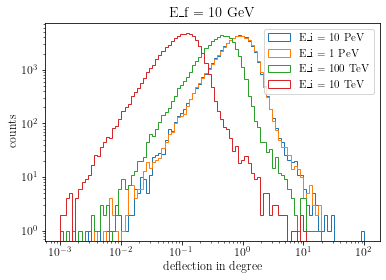

In [5]:
bins = np.logspace(-3, 2, 100)
plt.hist(df_dict_10P['df_10'].deflection, bins=bins, histtype='step', label=r'E\_i = 10 PeV')
plt.hist(df_dict['df_10'].deflection, bins=bins, histtype='step', label=r'E\_i = 1 PeV')
plt.hist(df_dict_100['df_08'].deflection, bins=bins, histtype='step', label=r'E\_i = 100 TeV')
plt.hist(df_dict_10['df_06'].deflection, bins=bins, histtype='step', label=r'E\_i = 10 TeV')
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.title(r'E\_f = 10 GeV')
plt.legend()
print(mode(df_dict_10P['df_10'].E_f))
print(mode(df_dict_10['df_06'].E_f))

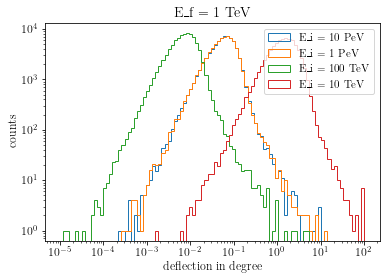

In [6]:
bins = np.logspace(-5, 2, 100)
plt.hist(df_dict_10P['df_03'].deflection, bins=bins, histtype='step', label=r'E\_i = 10 PeV')
plt.hist(df_dict['df_03'].deflection, bins=bins, histtype='step', label=r'E\_i = 1 PeV')
plt.hist(df_dict_100['df_02'].deflection, bins=bins, histtype='step', label=r'E\_i = 100 TeV')
plt.hist(df_dict_10['df_01'].deflection, bins=bins, histtype='step', label=r'E\_i = 10 TeV')
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.title(r'E\_f = 1 TeV')
plt.legend()

In [7]:
# 10% cut of E_min

mi = 0.9
quantile_low = 0.005 # 0.025
quantile_high = 0.995 # 0.975

# E_i = 10 PeV
deflection_median_10P_cut_10 = []
deflection_median_lower_10P_cut_10 = [] 
deflection_median_upper_10P_cut_10 = []
for i,d in enumerate(df_dict_10P):
    df = df_dict_10P[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df)))) 
    deflection_median_10P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_10P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_low)) 
    deflection_median_upper_10P_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_high) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

# E_i = 1 PeV    
deflection_median_1P_cut_10 = []
deflection_median_lower_1P_cut_10 = [] 
deflection_median_upper_1P_cut_10 = []
for d in df_dict:
    df = df_dict[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_1P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_1P_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_low)) 
    deflection_median_upper_1P_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_high) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    
# E_i = 100 TeV
deflection_median_100_cut_10 = []
deflection_median_lower_100_cut_10 = [] 
deflection_median_upper_100_cut_10 = []
for d in df_dict_100:
    df = df_dict_100[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_100_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_100_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_low)) 
    deflection_median_upper_100_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_high) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

# E_i = 10 TeV    
deflection_median_10_cut_10 = []
deflection_median_lower_10_cut_10 = [] 
deflection_median_upper_10_cut_10 = []
for d in df_dict_10:
    df = df_dict_10[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    deflection_median_10_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))
    deflection_median_lower_10_cut_10.append(np.median(df.deflection[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_low)) 
    deflection_median_upper_10_cut_10.append(np.quantile(df.deflection[df.E_f > mode(df.E_f) * mi], quantile_high) - np.median(df.deflection[df.E_f > mode(df.E_f) * mi]))

df_14 10000000.0 1.0 95000 94942 0.9895894736842106 0.9993894736842105 1001.0
df_13 10000000.0 5.0 95000 93946 0.9504 0.9889052631578947 1011.0
df_10 10000000.0 10.0 55000 53579 0.9276181818181818 0.9741636363636363 1027.0
df_09 10000000.0 50.0 55000 50969 0.8173636363636364 0.9267090909090909 1079.0
df_04 10000000.0 100.0 57500 51418 0.7472869565217392 0.8942260869565217 1118.0
df_08 10000000.0 500.0 65000 50406 0.48624615384615383 0.7754769230769231 1290.0
df_03 10000000.0 1000.0 72500 51536 0.34355862068965515 0.7108413793103449 1407.0
df_07 10000000.0 5000.0 85000 51362 0.10603529411764706 0.6042588235294117 1655.0
df_02 10000000.0 10000.0 87500 50512 0.05739428571428572 0.57728 1732.0
df_06 10000000.0 50000.0 142500 78654 0.012063157894736842 0.5519578947368421 1812.0
df_01 10000000.0 100000.0 92500 50343 0.006054054054054054 0.5442486486486486 1837.0
df_05 10000000.0 500000.0 92500 49829 0.001081081081081081 0.5386918918918919 1856.0
df_11 10000000.0 1000000.0 95000 50605 0.00071

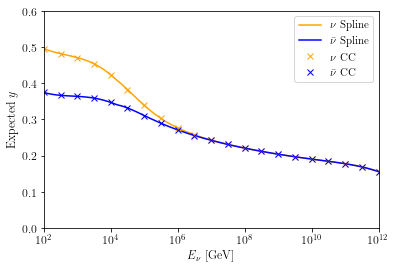

In [8]:
# Neutrino Review Paper Fig. 10
df_y = pd.read_hdf('data/y_data.hdf5')
# y: energy transfer to nucleus --> (1-y) energy transfer to muon, E_mu = (1-y) * E_nu
spl_nu = UnivariateSpline(df_y.neutrino_energy, df_y.exp_y_simps, s=0)
plt.plot(df_y.neutrino_energy, spl_nu(df_y.neutrino_energy), color='orange', label=r'$\nu$ Spline')

spl_nu_bar = UnivariateSpline(df_y.neutrino_energy, df_y.exp_y_bar_simps, s=0)
plt.plot(df_y.neutrino_energy, spl_nu_bar(df_y.neutrino_energy), color='blue', label=r'$\bar{\nu}$ Spline')


plt.plot(df_y.neutrino_energy[::5], df_y.exp_y_simps[::5], 'x', color='orange', label=r'$\nu \ \mathrm{CC}$')
plt.plot(df_y.neutrino_energy[::5], df_y.exp_y_bar_simps[::5], 'x', color='blue', label=r'$\bar{\nu} \ \mathrm{CC}$')
plt.xscale('log')
plt.xlabel(r'$E_\nu$ [GeV]')
plt.ylabel(r'Expected $y$')
plt.ylim(0., 0.6)
plt.xlim(1e2, 1e12)
plt.legend()
if save_plot:
    plt.savefig(plot_dir + 'expected_y.pdf')

poly params:  [ 0.01755369 -0.23276124  0.09293859  0.07262962] , errors:  [0.00181377 0.0185254  0.05273772 0.04044082]


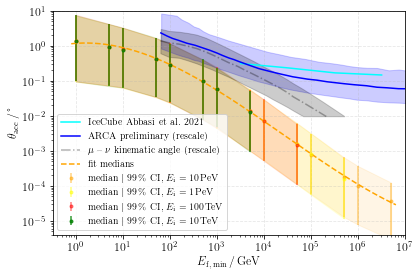

In [9]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)

interval = str(int((quantile_high - quantile_low)*100))

# E_i = 10 PeV
plt.errorbar(E_f_10P, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='orange')
# E_i = 1 PeV
plt.errorbar(E_f, deflection_median_1P_cut_10, yerr=(deflection_median_lower_1P_cut_10, deflection_median_upper_1P_cut_10), fmt='.', color='yellow', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut_10)-np.array(deflection_median_lower_1P_cut_10), np.array(deflection_median_1P_cut_10) + np.array(deflection_median_upper_1P_cut_10), alpha=0.1, color='yellow')
# E_i = 100 TeV
plt.errorbar(E_f_100, deflection_median_100_cut_10, yerr=(deflection_median_lower_100_cut_10, deflection_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut_10)-np.array(deflection_median_lower_100_cut_10), np.array(deflection_median_100_cut_10) + np.array(deflection_median_upper_100_cut_10), alpha=0.1, color='red')
# E_i = 10 TeV
plt.errorbar(E_f_10, deflection_median_10_cut_10, yerr=(deflection_median_lower_10_cut_10, deflection_median_upper_10_cut_10), fmt='.', color='green', alpha=0.8, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut_10)-np.array(deflection_median_lower_10_cut_10), np.array(deflection_median_10_cut_10) + np.array(deflection_median_upper_10_cut_10), alpha=0.1, color='green')

###### comparison to current neutrino telescopes ##########  
ARCA = pd.read_csv('angular_resolution/ARCA.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_high = pd.read_csv('angular_resolution/ARCA_high.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_low = pd.read_csv('angular_resolution/ARCA_low.csv', sep=';', decimal=',', names=['E', 'theta'])

# rescale neutrino energy to muon energy
def rescale_neutrino_E_to_muon_E(x, splines=None, no_rescale=False):
    if not no_rescale:    
        if splines == None:
            # naive rescale
            return x * 0.8
        else:
            return (1 - splines(x)) * x
    else:
        print('no rescale')
        return x
    
    
# IceCube 2021, https://arxiv.org/abs/2103.16931 (median angular resolution of muon reconstruction as function of
# muon energy)
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube Abbasi et al. 2021')

# ARCA 2021 2107.13050 (angular resolution as function of neutrino energy) preliminary
plt.plot(rescale_neutrino_E_to_muon_E(10**ARCA.E, splines=spl_nu), 10**ARCA.theta, '-', color='blue', label='ARCA preliminary (rescale)')
plt.fill_between(rescale_neutrino_E_to_muon_E(10**ARCA_low.E, splines=spl_nu), 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.2, color='blue')

# kinematic angle read from KM3NeT 2016
# kinematic_angle = pd.read_csv('data/kinematic_muon_neutrino_angle_KM3NeT.csv', sep=';', decimal=',', names=['E', 'theta'])
# plt.plot(rescale_neutrino_E_to_muon_E(kinematic_angle.E, splines=spl_nu), kinematic_angle.theta, '.', label=r'$\mu$ -- $\nu$ kinematic angle (rescale)') # scattering angle KM3NeT')

# kinematic anlge reade from KM3NeT/ARCA 2021
kinematic_angle_low = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/Low.csv', sep=';', decimal=',', names=['E', 'theta'])
kinematic_angle_mid = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/mid.csv', sep=';', decimal=',', names=['E', 'theta'])
kinematic_angle_high = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/High.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(rescale_neutrino_E_to_muon_E(10**kinematic_angle_mid.E, splines=spl_nu), 10**kinematic_angle_mid.theta, '-.', color='black', alpha=0.3, label=r'$\mu$ -- $\nu$ kinematic angle (rescale)') # scattering angle KM3NeT')
# plt.fill_between(rescale_neutrino_E_to_muon_E(10**kinematic_angle_low.E, splines=spl_nu), 10**kinematic_angle_low.theta, 10**kinematic_angle_high.theta[:-2], alpha=0.2, color='black')
plt.fill(np.append(rescale_neutrino_E_to_muon_E(10**kinematic_angle_low.E, splines=spl_nu), rescale_neutrino_E_to_muon_E(10**kinematic_angle_high.E, splines=spl_nu)[::-1]), 
         np.append(10**kinematic_angle_low.theta, 10**kinematic_angle_high.theta[::-1]), 
         alpha=0.2, color='black')


# polynom fit
def poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# E_i = 10 PeV
params, cov = curve_fit(poly, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly params: ', params, ', errors: ', errors)
x = np.logspace(-0.1, 6.8, 1000)
plt.plot(x, np.power(10, poly(np.log10(x), *params)), '--', color='orange', alpha=1, label='fit medians')


plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\theta_{\mathrm{acc}}\,/\,$°')
plt.xlabel(r'$E_{\mathrm{f,\,min}}\,/\,$GeV')
plt.xlim(right=1e7)
plt.ylim(4e-6, 10)
plt.grid(linestyle='--', alpha=0.3)
plt.legend(fontsize=9.5, loc='lower left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent_only_poly_new_resolution_rescale_no_icecube_paper_final.pdf', bbox_inches='tight')

poly3 params:  [ 0.01755369 -0.23276124  0.09293859  0.07262962] , errors:  [0.00181377 0.0185254  0.05273772 0.04044082]


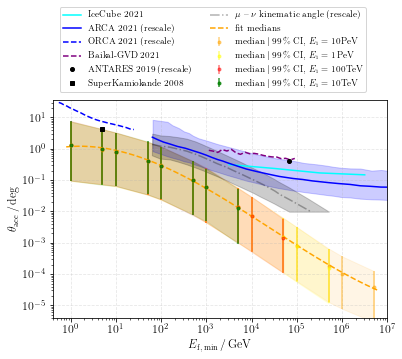

In [10]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)

interval = str(int((quantile_high - quantile_low)*100))

# E_i = 10 PeV
plt.errorbar(E_f_10P, deflection_median_10P_cut_10, yerr=(deflection_median_lower_10P_cut_10, deflection_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(deflection_median_10P_cut_10)-np.array(deflection_median_lower_10P_cut_10), np.array(deflection_median_10P_cut_10) + np.array(deflection_median_upper_10P_cut_10), alpha=0.1, color='orange')
# E_i = 1 PeV
plt.errorbar(E_f, deflection_median_1P_cut_10, yerr=(deflection_median_lower_1P_cut_10, deflection_median_upper_1P_cut_10), fmt='.', color='yellow', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(deflection_median_1P_cut_10)-np.array(deflection_median_lower_1P_cut_10), np.array(deflection_median_1P_cut_10) + np.array(deflection_median_upper_1P_cut_10), alpha=0.1, color='yellow')
# E_i = 100 TeV
plt.errorbar(E_f_100, deflection_median_100_cut_10, yerr=(deflection_median_lower_100_cut_10, deflection_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(deflection_median_100_cut_10)-np.array(deflection_median_lower_100_cut_10), np.array(deflection_median_100_cut_10) + np.array(deflection_median_upper_100_cut_10), alpha=0.1, color='red')
# E_i = 10 TeV
plt.errorbar(E_f_10, deflection_median_10_cut_10, yerr=(deflection_median_lower_10_cut_10, deflection_median_upper_10_cut_10), fmt='.', color='green', alpha=0.8, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(deflection_median_10_cut_10)-np.array(deflection_median_lower_10_cut_10), np.array(deflection_median_10_cut_10) + np.array(deflection_median_upper_10_cut_10), alpha=0.1, color='green')


# rescale neutrino energy to muon energy
def rescale_neutrino_E_to_muon_E(x, splines=None, no_rescale=False):
    if not no_rescale:    
        if splines == None:
            # naive rescale
            return x * 0.8
        else:
            return (1 - splines(x)) * x
    else:
        print('no rescale')
        return x
    
###### comparison to current neutrino telescopes ##########      
    
    
# IceCube 2021, https://arxiv.org/abs/2103.16931 (median angular resolution of muon reconstruction as function of
# muon energy)
IceCube_median_error_E = [3154.6222956675642, 31393.67119012529, 318535.5398366218, 3139367.1190125225]
IceCube_median_error_theta = [0.3132923103706559, 0.23583164894478967, 0.1696125188412025, 0.147416292664677]
plt.plot(IceCube_median_error_E, IceCube_median_error_theta, '-', color='cyan', label='IceCube 2021')

# ARCA 2021 2107.13050 (angular resolution as function of neutrino energy) preliminary
ARCA = pd.read_csv('angular_resolution/ARCA.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_high = pd.read_csv('angular_resolution/ARCA_high.csv', sep=';', decimal=',', names=['E', 'theta'])
ARCA_low = pd.read_csv('angular_resolution/ARCA_low.csv', sep=';', decimal=',', names=['E', 'theta'])

plt.plot(rescale_neutrino_E_to_muon_E(10**ARCA.E, splines=spl_nu), 10**ARCA.theta, '-', color='blue', label='ARCA 2021 (rescale)')
plt.fill_between(rescale_neutrino_E_to_muon_E(10**ARCA_low.E, splines=spl_nu), 10**ARCA_low.theta, 10**ARCA_high.theta, alpha=0.2, color='blue')

# ORCA 2021
ORCA = pd.read_csv('data/ORCA_resolution/ORCA_nu_mu_resolution.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(rescale_neutrino_E_to_muon_E(ORCA.E, splines=spl_nu), ORCA.theta, '--', color='blue', label='ORCA 2021 (rescale)')

# Baikal 2019 (also published in paper of 2021 2106.06288v2)
# plt.plot(rescale_neutrino_E_to_muon_E(100*1e3, splines=spl_nu), 0.5, '^', markersize=4, color='black', label='Baikal 2019 (rescale)') # for track length > 500 meter and E_nu > 10 GeV

# Baikal 2021 ICRC Proceedings (2ns time resolution)
Baikal = pd.read_csv('angular_resolution/Baikal_2021_ICRC_resolution.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(Baikal.E*1e3, Baikal.theta, '--', color='purple', label='Baikal-GVD 2021')

# ANTARES 2019
plt.plot(rescale_neutrino_E_to_muon_E(100*1e3, splines=spl_nu), 0.4, 'o', markersize=4, color='black', label='ANTARES 2019 (rescale)')

# Kamiokande 2008
plt.plot(5, 4.3, 's', markersize=4, color='black', label='SuperKamiokande 2008')



# kinematic angle read from KM3NeT 2016
# kinematic_angle = pd.read_csv('data/kinematic_muon_neutrino_angle_KM3NeT.csv', sep=';', decimal=',', names=['E', 'theta'])
# plt.plot(rescale_neutrino_E_to_muon_E(kinematic_angle.E, splines=spl_nu), kinematic_angle.theta, '.', label=r'$\mu$ -- $\nu$ kinematic angle (rescale)') # scattering angle KM3NeT')

# kinematic anlge reade from KM3NeT/ARCA 2021
kinematic_angle_low = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/Low.csv', sep=';', decimal=',', names=['E', 'theta'])
kinematic_angle_mid = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/mid.csv', sep=';', decimal=',', names=['E', 'theta'])
kinematic_angle_high = pd.read_csv('data/mu_nu_kinematic_ARCA_2021/High.csv', sep=';', decimal=',', names=['E', 'theta'])
plt.plot(rescale_neutrino_E_to_muon_E(10**kinematic_angle_mid.E, splines=spl_nu), 10**kinematic_angle_mid.theta, '-.', color='black', alpha=0.3, label=r'$\mu$ -- $\nu$ kinematic angle (rescale)') # scattering angle KM3NeT')
# plt.fill_between(rescale_neutrino_E_to_muon_E(10**kinematic_angle_low.E, splines=spl_nu), 10**kinematic_angle_low.theta, 10**kinematic_angle_high.theta[:-2], alpha=0.2, color='black')
plt.fill(np.append(rescale_neutrino_E_to_muon_E(10**kinematic_angle_low.E, splines=spl_nu), rescale_neutrino_E_to_muon_E(10**kinematic_angle_high.E, splines=spl_nu)[::-1]), 
         np.append(10**kinematic_angle_low.theta, 10**kinematic_angle_high.theta[::-1]), 
         alpha=0.2, color='black')




# Neutrino Review Paper, ref 114
def get_mean_theta(E):
    '''
    Parameters
    ----------
        E: neutrino energy in TeV
    Returns
    -------
        mean_theta: mean scattering angle in degree
        
    '''
    return 0.7 / E**0.6

x = np.logspace(0.9, 6.8, 1000)
# plt.plot(x, get_mean_theta(x/1e3), '--', color='black', label='approx')


# polynom fit
def poly3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d


# E_i = 10 PeV
params, cov = curve_fit(poly3, np.log10(E_f_10P), np.log10(deflection_median_10P_cut_10))
errors = np.sqrt(np.diag(cov))
print('poly3 params: ', params, ', errors: ', errors)
x = np.logspace(-0.1, 6.8, 1000)
plt.plot(x, np.power(10, poly3(np.log10(x), 0.0176, -0.2328, 0.0929, 0.0726)), '--', color='orange', alpha=1, label=r'fit medians')
# plt.plot(x, np.power(10, poly3(np.log10(x), *params)), '--', color='orange', alpha=1, label=r'fit medians')


plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\theta_{\mathrm{acc}}\,/\,$deg')
plt.xlabel(r'$E_{\mathrm{f,\,min}}\,/\,$GeV')
plt.xlim(0.4, right=1e7)
plt.ylim(4e-6, 35)
plt.grid(linestyle='--', alpha=0.3)
plt.legend(fontsize=9, bbox_to_anchor=(0.95, 1.45), ncol=2)
# plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent_only_poly_new_resolution_rescale_no_icecube_paper_final_all.pdf', bbox_inches='tight')

In [11]:
# print median values for E_i = 10 PeV with lower and upper 99% limits, (use E_f = 500 GeV in abstract)
for i, e,d in zip(range(len(E_f_10P)), E_f_10P, deflection_median_10P_cut_10):
    print('E_f = {} GeV, med(d) = {} ° - {} ° + {} °'.format(e, d, d-deflection_median_lower_10P_cut_10[i], d+deflection_median_upper_10P_cut_10[i]))

E_f = 1.0 GeV, med(d) = 1.364041048724775 ° - 0.09627269840768218 ° + 7.331349630101591 °
E_f = 5.0 GeV, med(d) = 0.9483466383808535 ° - 0.07360734914014869 ° + 4.130654607514239 °
E_f = 10.0 GeV, med(d) = 0.7883431131638773 ° - 0.06382703361896126 ° + 3.3103430001380896 °
E_f = 50.0 GeV, med(d) = 0.41943206823138385 ° - 0.03408535884144743 ° + 1.64789505415372 °
E_f = 100.0 GeV, med(d) = 0.29462405458308 ° - 0.023876545839217993 ° + 1.1721507350932456 °
E_f = 500.0 GeV, med(d) = 0.10191358252554378 ° - 0.008132355978278048 ° + 0.39237911602154857 °
E_f = 1000.0 GeV, med(d) = 0.05897078319674996 ° - 0.004366235243838372 ° + 0.2265673598690066 °
E_f = 5000.0 GeV, med(d) = 0.01409907212991769 ° - 0.001003013972709401 ° + 0.05415132431137967 °
E_f = 10000.0 GeV, med(d) = 0.007331084929658684 ° - 0.000545047677492148 ° + 0.02832079988852077 °
E_f = 50000.0 GeV, med(d) = 0.0015304523102997465 ° - 0.00011257509224775426 ° + 0.006227747679178137 °
E_f = 100000.0 GeV, med(d) = 0.00077953695120

In [12]:
# print median values for E_i = 1 PeV with lower and upper 99% limits, (use E_f = 500 GeV in abstract)
for i, e,d in zip(range(len(E_f)), E_f, deflection_median_1P_cut_10):
    print('E_f = {} GeV, med(d) = {} ° - {} ° + {} °'.format(e, d, d-deflection_median_lower_1P_cut_10[i], d+deflection_median_upper_1P_cut_10[i]))

E_f = 1.0 GeV, med(d) = 1.3604512699338573 ° - 0.09348865637831044 ° + 7.378990178508948 °
E_f = 5.0 GeV, med(d) = 0.952614025178979 ° - 0.07241613029626577 ° + 4.231052257911954 °
E_f = 10.0 GeV, med(d) = 0.7927173824614776 ° - 0.06266604679238187 ° + 3.2025132624680874 °
E_f = 50.0 GeV, med(d) = 0.4213334170461231 ° - 0.03426295003829231 ° + 1.6793007595677616 °
E_f = 100.0 GeV, med(d) = 0.2920281231686144 ° - 0.023112507596441883 ° + 1.1004824808132316 °
E_f = 500.0 GeV, med(d) = 0.10172736431524004 ° - 0.008322687744973094 ° + 0.3860179217859109 °
E_f = 1000.0 GeV, med(d) = 0.059217068634979365 ° - 0.004351063361567531 ° + 0.22863251777741087 °
E_f = 5000.0 GeV, med(d) = 0.014164233999297645 ° - 0.0009931354686591458 ° + 0.057766544713231664 °
E_f = 10000.0 GeV, med(d) = 0.0073551899251443785 ° - 0.0005207970596731901 ° + 0.02876267534113692 °
E_f = 50000.0 GeV, med(d) = 0.0015315073912256488 ° - 0.0001104749293626493 ° + 0.006007785879973593 °
E_f = 100000.0 GeV, med(d) = 0.000789

In [13]:
# print median values for E_i = 100 TeV with lower and upper 99% limits, (use E_f = 500 GeV in abstract)
for i, e,d in zip(range(len(E_f_100)), E_f_100, deflection_median_100_cut_10):
    print('E_f = {} GeV, med(d) = {} ° - {} ° + {} °'.format(e, d, d-deflection_median_lower_100_cut_10[i], d+deflection_median_upper_100_cut_10[i]))

E_f = 1.0 GeV, med(d) = 1.3677510390308334 ° - 0.09651636591581537 ° + 7.747106525090764 °
E_f = 5.0 GeV, med(d) = 0.9521872441135538 ° - 0.07408810786370403 ° + 4.267688150459365 °
E_f = 10.0 GeV, med(d) = 0.7890031135911947 ° - 0.06534433416272417 ° + 3.2796198479205345 °
E_f = 50.0 GeV, med(d) = 0.4178958157229755 ° - 0.03460918507161658 ° + 1.6476655065931827 °
E_f = 100.0 GeV, med(d) = 0.29121980446429074 ° - 0.02382313164963726 ° + 1.1770604364552761 °
E_f = 500.0 GeV, med(d) = 0.1016657353651767 ° - 0.00762801745086842 ° + 0.4057052055791805 °
E_f = 1000.0 GeV, med(d) = 0.05923446633451403 ° - 0.004419420231858856 ° + 0.24664927969227118 °
E_f = 5000.0 GeV, med(d) = 0.014237944057245346 ° - 0.001007804593172922 ° + 0.05539177074079725 °
E_f = 10000.0 GeV, med(d) = 0.007366987354957324 ° - 0.0005111855172908399 ° + 0.029493188412227027 °
E_f = 50000.0 GeV, med(d) = 0.0014601538819728776 ° - 0.00010907747345909102 ° + 0.0057037560404964265 °


In [14]:
# print median values for E_i = 10 TeV with lower and upper 99% limits, (use E_f = 500 GeV in abstract)
for i, e,d in zip(range(len(E_f_10)), E_f_10, deflection_median_10_cut_10):
    print('E_f = {} GeV, med(d) = {} ° - {} ° + {} °'.format(e, d, d-deflection_median_lower_10_cut_10[i], d+deflection_median_upper_10_cut_10[i]))

E_f = 1.0 GeV, med(d) = 1.3692637468908377 ° - 0.09650045078236835 ° + 7.470849746498546 °
E_f = 5.0 GeV, med(d) = 0.9499004224251834 ° - 0.07071901422770234 ° + 4.232217954241385 °
E_f = 10.0 GeV, med(d) = 0.7851982662633762 ° - 0.06464677614829986 ° + 3.3041133529422804 °
E_f = 50.0 GeV, med(d) = 0.4197928379862475 ° - 0.03487441559181076 ° + 1.717451206099142 °
E_f = 100.0 GeV, med(d) = 0.2918227434510286 ° - 0.02442936856619483 ° + 1.1509109780653937 °
E_f = 500.0 GeV, med(d) = 0.10171876251803692 ° - 0.007752182798684706 ° + 0.40870668785506226 °
E_f = 1000.0 GeV, med(d) = 0.05989772929347026 ° - 0.004833692094351626 ° + 0.23075756253478172 °
E_f = 5000.0 GeV, med(d) = 0.013339616622416735 ° - 0.0009397200839092662 ° + 0.05300148084316003 °


In [15]:
0.000511 * 1e1

0.00511

median dist:  17521.549791812235
low dist 95%:  8039.545665632053
high dist 95%:  26518.59826374591


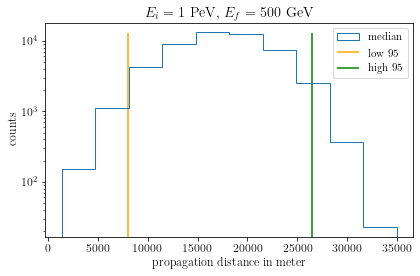

In [16]:
# Get distances for E_i = 1 PeV to E_f = 500 GeV (for abstract info)

mi = 0.9
median_dist_1_500 = np.median(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500])
print('median dist: ', median_dist_1_500)
low_dist_1_500 = np.quantile(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500], 0.025)
print('low dist 95%: ', low_dist_1_500)
high_dist_1_500 = np.quantile(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500], 0.975) # - median_dist_1_500
print('high dist 95%: ', high_dist_1_500)

plt.hist(df_dict['df_08'].distances[df_dict['df_08'].E_f > mi * 500], histtype='step', label='median')
plt.vlines(low_dist_1_500, 0, 13e3, color='orange', label='low 95%')
plt.vlines(high_dist_1_500, 0, 13e3, color='green', label='high 95%')
plt.yscale('log')
plt.ylabel('counts')
plt.xlabel('propagation distance in meter')
plt.legend()
plt.title(r'$E_i = 1$ PeV, $E_f = 500$ GeV')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'distance_1PeV_500GeV.pdf')

In [17]:
# Check deviation between water and ice simulation ---> less than 1% deviation
deflection_median_10P_cut_10_water = np.array([
                     0.79150338217522568093,
                     0.42027063875051527748,
                     0.2932342756713901575,
                     0.1012175759191841121,
                     0.059028678121102240653,
                     0.014155812831099963241,
                     0.0073208573158286867227,
                     0.0015401160779994301778,
                     0.00077872394269746531866,
                     0.00017512560410630505606,
                     0.000100290243100752244415,
                     3.8162822474097349672e-05])
water_ice_deviation = (deflection_median_10P_cut_10[2:] - deflection_median_10P_cut_10_water) / deflection_median_10P_cut_10[2:] * 100 # values in percent
water_ice_deviation

array([-0.40087482, -0.19993   ,  0.47171264,  0.68293802, -0.09817561,
       -0.4024428 ,  0.13951024, -0.63143214,  0.10429377, -0.07257024,
        0.40159722, -0.12536046], dtype=float128)

In [18]:
Achtung! Für Wasser fehlen noch die Simulationen für 1 GeV und 5 GeV

SyntaxError: invalid syntax (<ipython-input-18-65621fd38476>, line 1)

## distance plot

In [19]:
# 10% cut of E_min

mi = 0.9
quantile_low = 0.005 # 0.025
quantile_high = 0.995 # 0.975

# E_i = 10 PeV
distances_median_10P_cut_10 = []
distances_median_lower_10P_cut_10 = [] 
distances_median_upper_10P_cut_10 = []
for i,d in enumerate(df_dict_10P):
    df = df_dict_10P[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df)))) 
    distances_median_10P_cut_10.append(np.median(df.distances[df.E_f > mode(df.E_f) * mi]))
    distances_median_lower_10P_cut_10.append(np.median(df.distances[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.distances[df.E_f > mode(df.E_f) * mi], quantile_low)) 
    distances_median_upper_10P_cut_10.append(np.quantile(df.distances[df.E_f > mode(df.E_f) * mi], quantile_high) - np.median(df.distances[df.E_f > mode(df.E_f) * mi]))

    

# E_i = 1 PeV    
distances_median_1P_cut_10 = []
distances_median_lower_1P_cut_10 = [] 
distances_median_upper_1P_cut_10 = []
for d in df_dict:
    df = df_dict[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    distances_median_1P_cut_10.append(np.median(df.distances[df.E_f > mode(df.E_f) * mi]))
    distances_median_lower_1P_cut_10.append(np.median(df.distances[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.distances[df.E_f > mode(df.E_f) * mi], quantile_low)) 
    distances_median_upper_1P_cut_10.append(np.quantile(df.distances[df.E_f > mode(df.E_f) * mi], quantile_high) - np.median(df.distances[df.E_f > mode(df.E_f) * mi]))
    
# E_i = 100 TeV
distances_median_100_cut_10 = []
distances_median_lower_100_cut_10 = [] 
distances_median_upper_100_cut_10 = []
for d in df_dict_100:
    df = df_dict_100[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    distances_median_100_cut_10.append(np.median(df.distances[df.E_f > mode(df.E_f) * mi]))
    distances_median_lower_100_cut_10.append(np.median(df.distances[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.distances[df.E_f > mode(df.E_f) * mi], quantile_low)) 
    distances_median_upper_100_cut_10.append(np.quantile(df.distances[df.E_f > mode(df.E_f) * mi], quantile_high) - np.median(df.distances[df.E_f > mode(df.E_f) * mi]))

# E_i = 10 TeV    
distances_median_10_cut_10 = []
distances_median_lower_10_cut_10 = [] 
distances_median_upper_10_cut_10 = []
for d in df_dict_10:
    df = df_dict_10[d]
    print(d, df.E_i[0], mode(df.E_f), len(df), len(df[df.E_f > mode(df.E_f) * mi]), len(df[df.E_f == mode(df.E_f)])/len(df), len(df[df.E_f > mode(df.E_f) * mi])/len(df), np.round(1000/(len(df[df.E_f > mode(df.E_f) * mi])/len(df))))
    distances_median_10_cut_10.append(np.median(df.distances[df.E_f > mode(df.E_f) * mi]))
    distances_median_lower_10_cut_10.append(np.median(df.distances[df.E_f > mode(df.E_f) * mi]) - np.quantile(df.distances[df.E_f > mode(df.E_f) * mi], quantile_low)) 
    distances_median_upper_10_cut_10.append(np.quantile(df.distances[df.E_f > mode(df.E_f) * mi], quantile_high) - np.median(df.distances[df.E_f > mode(df.E_f) * mi]))

df_14 10000000.0 1.0 95000 94942 0.9895894736842106 0.9993894736842105 1001.0
df_13 10000000.0 5.0 95000 93946 0.9504 0.9889052631578947 1011.0
df_10 10000000.0 10.0 55000 53579 0.9276181818181818 0.9741636363636363 1027.0
df_09 10000000.0 50.0 55000 50969 0.8173636363636364 0.9267090909090909 1079.0
df_04 10000000.0 100.0 57500 51418 0.7472869565217392 0.8942260869565217 1118.0
df_08 10000000.0 500.0 65000 50406 0.48624615384615383 0.7754769230769231 1290.0
df_03 10000000.0 1000.0 72500 51536 0.34355862068965515 0.7108413793103449 1407.0
df_07 10000000.0 5000.0 85000 51362 0.10603529411764706 0.6042588235294117 1655.0
df_02 10000000.0 10000.0 87500 50512 0.05739428571428572 0.57728 1732.0
df_06 10000000.0 50000.0 142500 78654 0.012063157894736842 0.5519578947368421 1812.0
df_01 10000000.0 100000.0 92500 50343 0.006054054054054054 0.5442486486486486 1837.0
df_05 10000000.0 500000.0 92500 49829 0.001081081081081081 0.5386918918918919 1856.0
df_11 10000000.0 1000000.0 95000 50605 0.00071

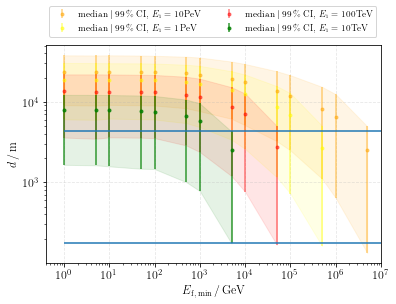

In [20]:
### fit deflection medians
x = np.logspace(0.1, 7, 1000)

interval = str(int((quantile_high - quantile_low)*100))

# E_i = 10 PeV
plt.errorbar(E_f_10P, distances_median_10P_cut_10, yerr=(distances_median_lower_10P_cut_10, distances_median_upper_10P_cut_10), fmt='.', color='orange', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 10\,$PeV')
plt.fill_between(E_f_10P, np.array(distances_median_10P_cut_10)-np.array(distances_median_lower_10P_cut_10), np.array(distances_median_10P_cut_10) + np.array(distances_median_upper_10P_cut_10), alpha=0.1, color='orange')
# E_i = 1 PeV
plt.errorbar(E_f, distances_median_1P_cut_10, yerr=(distances_median_lower_1P_cut_10, distances_median_upper_1P_cut_10), fmt='.', color='yellow', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 1\,$PeV')
plt.fill_between(E_f, np.array(distances_median_1P_cut_10)-np.array(distances_median_lower_1P_cut_10), np.array(distances_median_1P_cut_10) + np.array(distances_median_upper_1P_cut_10), alpha=0.1, color='yellow')
# E_i = 100 TeV
plt.errorbar(E_f_100, distances_median_100_cut_10, yerr=(distances_median_lower_100_cut_10, distances_median_upper_100_cut_10), fmt='.', color='red', alpha=0.5, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 100\,$TeV')
plt.fill_between(E_f_100, np.array(distances_median_100_cut_10)-np.array(distances_median_lower_100_cut_10), np.array(distances_median_100_cut_10) + np.array(distances_median_upper_100_cut_10), alpha=0.1, color='red')
# E_i = 10 TeV
plt.errorbar(E_f_10, distances_median_10_cut_10, yerr=(distances_median_lower_10_cut_10, distances_median_upper_10_cut_10), fmt='.', color='green', alpha=0.8, label=r'median$\;|\;'+interval+'\,\%$ CI, $E_\mathrm{i} = 10\,$TeV')
plt.fill_between(E_f_10, np.array(distances_median_10_cut_10)-np.array(distances_median_lower_10_cut_10), np.array(distances_median_10_cut_10) + np.array(distances_median_upper_10_cut_10), alpha=0.1, color='green')


  
    
plt.hlines(distances_median_10_cut_10[-1]-distances_median_lower_10_cut_10[-1], 1, 1e7)
plt.hlines(distances_median_10_cut_10[-1]+distances_median_upper_10_cut_10[-1], 1, 1e7)



plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$d\,/\,$m')
plt.xlabel(r'$E_{\mathrm{f,\,min}}\,/\,$GeV')
plt.xlim(0.4, right=1e7)
plt.grid(linestyle='--', alpha=0.3)
plt.legend(fontsize=9, bbox_to_anchor=(1., 1.2), ncol=2)
# plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'fit_median_defl_cut_10percent_only_poly_new_resolution_rescale_no_icecube_paper_final_all_distances.pdf', bbox_inches='tight')

the higher the initial energy, the longer the propagation distance, but the total deflection depends only on the final muon energy


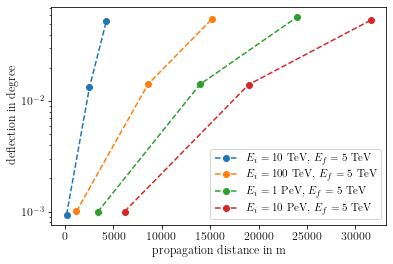

In [21]:
d_10TeV_5TeV = [distances_median_10_cut_10[-1]-distances_median_lower_10_cut_10[-1], distances_median_10_cut_10[-1], distances_median_10_cut_10[-1]+distances_median_upper_10_cut_10[-1]]
defl_10TeV_5TeV = [deflection_median_10_cut_10[-1]-deflection_median_lower_10_cut_10[-1], deflection_median_10_cut_10[-1], deflection_median_10_cut_10[-1]+deflection_median_upper_10_cut_10[-1]]
plt.plot(d_10TeV_5TeV, defl_10TeV_5TeV, 'o--', label=r'$E_i = 10$ TeV, $E_f = 5$ TeV')

d_100TeV_5TeV = [distances_median_100_cut_10[-3]-distances_median_lower_100_cut_10[-3], distances_median_100_cut_10[-3], distances_median_100_cut_10[-3]+distances_median_upper_100_cut_10[-3]]
defl_100TeV_5TeV = [deflection_median_100_cut_10[-3]-deflection_median_lower_100_cut_10[-3], deflection_median_100_cut_10[-3], deflection_median_100_cut_10[-3]+deflection_median_upper_100_cut_10[-3]]
plt.plot(d_100TeV_5TeV, defl_100TeV_5TeV, 'o--', label=r'$E_i = 100$ TeV, $E_f = 5$ TeV')

d_1PeV_5TeV = [distances_median_1P_cut_10[-5]-distances_median_lower_1P_cut_10[-5], distances_median_1P_cut_10[-5], distances_median_1P_cut_10[-5]+distances_median_upper_1P_cut_10[-5]]
defl_1PeV_5TeV = [deflection_median_1P_cut_10[-5]-deflection_median_lower_1P_cut_10[-5], deflection_median_1P_cut_10[-5], deflection_median_1P_cut_10[-5]+deflection_median_upper_1P_cut_10[-5]]
plt.plot(d_1PeV_5TeV, defl_1PeV_5TeV, 'o--', label=r'$E_i = 1$ PeV, $E_f = 5$ TeV')

d_10PeV_5TeV = [distances_median_10P_cut_10[-7]-distances_median_lower_10P_cut_10[-7], distances_median_10P_cut_10[-7], distances_median_10P_cut_10[-7]+distances_median_upper_10P_cut_10[-7]]
defl_10PeV_5TeV = [deflection_median_10P_cut_10[-7]-deflection_median_lower_10P_cut_10[-7], deflection_median_10P_cut_10[-7], deflection_median_10P_cut_10[-7]+deflection_median_upper_10P_cut_10[-7]]
plt.plot(d_10PeV_5TeV, defl_10PeV_5TeV, 'o--', label=r'$E_i = 10$ PeV, $E_f = 5$ TeV')


plt.yscale('log')
plt.xlabel('propagation distance in m')
plt.ylabel('deflection in degree')
plt.legend()
print('the higher the initial energy, the longer the propagation distance, but the total deflection depends only on \
the final muon energy')

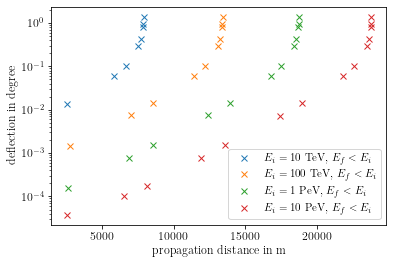

In [22]:
plt.plot(distances_median_10_cut_10, deflection_median_10_cut_10, 'x', label=r'$E_i = 10$ TeV, $E_f < E_i$')
plt.plot(distances_median_100_cut_10, deflection_median_100_cut_10, 'x', label=r'$E_i = 100$ TeV, $E_f < E_i$')
plt.plot(distances_median_1P_cut_10, deflection_median_1P_cut_10, 'x', label=r'$E_i = 1$ PeV, $E_f < E_i$')
plt.plot(distances_median_10P_cut_10, deflection_median_10P_cut_10, 'x', label=r'$E_i = 10$ PeV, $E_f < E_i$')
plt.yscale('log')
plt.xlabel('propagation distance in m')
plt.ylabel('deflection in degree')
plt.legend()

In [154]:
# print median values for E_i = 10 PeV with lower and upper 99% limits, (use E_f = 500 GeV in abstract)
for i, e,d in zip(range(len(E_f_10P)), E_f_10P, distances_median_10P_cut_10):
    print('E_f = {} GeV, med(d) = {} km - {} km + {} km'.format(e, d/1e3, (d-distances_median_lower_10P_cut_10[i])/1e3, (d+distances_median_upper_10P_cut_10[i])/1e3))

E_f = 1.0 GeV, med(d) = 23.748702005775957 km - 9.09723223671143 km + 37.78564304455197 km
E_f = 5.0 GeV, med(d) = 23.76409759556561 km - 8.986780123967877 km + 37.621585312229946 km
E_f = 10.0 GeV, med(d) = 23.76276007652559 km - 9.153733521203089 km + 37.7922644976993 km
E_f = 50.0 GeV, med(d) = 23.652432796945202 km - 9.068864437692818 km + 37.55354770585037 km
E_f = 100.0 GeV, med(d) = 23.47375690298274 km - 8.999391312020517 km + 37.248604723202774 km
E_f = 500.0 GeV, med(d) = 22.55873086033471 km - 8.325440483034715 km + 36.30220422952631 km
E_f = 1000.0 GeV, med(d) = 21.796768250158813 km - 7.645075590773198 km + 35.44658015542664 km
E_f = 5000.0 GeV, med(d) = 18.962709291645975 km - 6.157221508138479 km + 31.601746668053885 km
E_f = 10000.0 GeV, med(d) = 17.396123048564483 km - 5.113291192290988 km + 29.44232507116777 km
E_f = 50000.0 GeV, med(d) = 13.583812962441302 km - 3.2484684065953444 km + 23.961083542969508 km
E_f = 100000.0 GeV, med(d) = 11.946253735177969 km - 2.490357

In [155]:
# print median values for E_i = 1 PeV with lower and upper 99% limits, (use E_f = 500 GeV in abstract)
for i, e,d in zip(range(len(E_f)), E_f, distances_median_1P_cut_10):
    print('E_f = {} GeV, med(d) = {} km - {} km + {} km'.format(e, d/1e3, (d-distances_median_lower_1P_cut_10[i])/1e3, (d+distances_median_upper_1P_cut_10[i])/1e3))

E_f = 1.0 GeV, med(d) = 18.725034305179445 km - 6.0487705960209315 km + 30.36153178618533 km
E_f = 5.0 GeV, med(d) = 18.738177625056785 km - 5.974921130420256 km + 30.26416682756743 km
E_f = 10.0 GeV, med(d) = 18.693247262192834 km - 6.190138414880145 km + 30.14740333480693 km
E_f = 50.0 GeV, med(d) = 18.53183600732742 km - 6.082010763354159 km + 30.035041508072528 km
E_f = 100.0 GeV, med(d) = 18.39354692716551 km - 6.023324397452785 km + 29.86549158752454 km
E_f = 500.0 GeV, med(d) = 17.521549791812234 km - 5.4358769502069535 km + 28.8647816220318 km
E_f = 1000.0 GeV, med(d) = 16.774363169032817 km - 4.847402268852366 km + 27.92581181034106 km
E_f = 5000.0 GeV, med(d) = 13.939015824377327 km - 3.38169679907237 km + 23.984876427742634 km
E_f = 10000.0 GeV, med(d) = 12.377015787017266 km - 2.5993750963747297 km + 21.781089426349347 km
E_f = 50000.0 GeV, med(d) = 8.56491141217275 km - 1.1578889049662702 km + 15.666229308052321 km
E_f = 100000.0 GeV, med(d) = 6.892465697226101 km - 0.7259

In [156]:
# print median values for E_i = 100 TeV with lower and upper 99% limits, (use E_f = 500 GeV in abstract)
for i, e,d in zip(range(len(E_f_100)), E_f_100, distances_median_100_cut_10):
    print('E_f = {} GeV, med(d) = {} km - {} km + {} km'.format(e, d/1e3, (d-distances_median_lower_100_cut_10[i])/1e3, (d+distances_median_upper_100_cut_10[i])/1e3))

E_f = 1.0 GeV, med(d) = 13.450435972349634 km - 3.598765321052244 km + 21.890341893765186 km
E_f = 5.0 GeV, med(d) = 13.409565054797799 km - 3.476752603364546 km + 21.897535800121 km
E_f = 10.0 GeV, med(d) = 13.375835810839972 km - 3.6220914089637937 km + 21.8838966028423 km
E_f = 50.0 GeV, med(d) = 13.238340317257114 km - 3.5827358311106563 km + 21.65341129473489 km
E_f = 100.0 GeV, med(d) = 13.099834343250542 km - 3.5397830443595413 km + 21.5505787009474 km
E_f = 500.0 GeV, med(d) = 12.21693219008709 km - 2.871808762296894 km + 20.469602285610467 km
E_f = 1000.0 GeV, med(d) = 11.46083136974409 km - 2.377936436356997 km + 19.36784382298262 km
E_f = 5000.0 GeV, med(d) = 8.58168323880294 km - 1.1977066292750678 km + 15.19209035606172 km
E_f = 10000.0 GeV, med(d) = 7.027840814684232 km - 0.7643326473349753 km + 12.658337020940737 km
E_f = 50000.0 GeV, med(d) = 2.7480443955296203 km - 0.1681770664238261 km + 5.019567644014373 km


In [157]:
# print median values for E_i = 10 TeV with lower and upper 99% limits, (use E_f = 500 GeV in abstract)
for i, e,d in zip(range(len(E_f_10)), E_f_10, distances_median_10_cut_10):
    print('E_f = {} GeV, med(d) = {} km - {} km + {} km'.format(e, d/1e3, (d-distances_median_lower_10_cut_10[i])/1e3, (d+distances_median_upper_10_cut_10[i])/1e3))

E_f = 1.0 GeV, med(d) = 7.91321255491458 km - 1.6507532585195923 km + 12.200319263655327 km
E_f = 5.0 GeV, med(d) = 7.892400236924168 km - 1.6283030297665955 km + 12.177838839214365 km
E_f = 10.0 GeV, med(d) = 7.841359342389708 km - 1.5791778109764836 km + 12.127968151382781 km
E_f = 50.0 GeV, med(d) = 7.718958977971143 km - 1.4763644127335511 km + 11.976463316160467 km
E_f = 100.0 GeV, med(d) = 7.5489967969251985 km - 1.4624666782492906 km + 11.802449725689105 km
E_f = 500.0 GeV, med(d) = 6.68103149761912 km - 1.0064235804521622 km + 10.667822248820903 km
E_f = 1000.0 GeV, med(d) = 5.857159295326079 km - 0.7788511924191753 km + 9.540316671130258 km
E_f = 5000.0 GeV, med(d) = 2.5404123464967423 km - 0.17435389110568303 km + 4.2819917815645345 km


## analyze deflection for a very short propagation distance at high energies

E_i = 100 TeV, E_f =  10.0  TeV


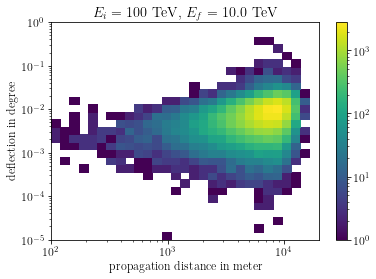

In [23]:
key = 'df_02'

bins = (np.logspace(2, 4.3, 30), np.logspace(-5, 0, 30))
plt.hist2d(df_dict_100[key].distances[df_dict_100[key].E_f > 0.9 * mode(df_dict_100[key].E_f)], 
           df_dict_100[key].deflection[df_dict_100[key].E_f > 0.9 * mode(df_dict_100[key].E_f)],
           bins=bins, cmin=1, norm=mpl.colors.LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.xlabel('propagation distance in meter')
plt.ylabel('deflection in degree')
plt.colorbar()
plt.title(r'$E_i = 100$ TeV, $E_f = {}$ TeV'.format(mode(df_dict_100[key].E_f)/1e3))
print('E_i = 100 TeV, E_f = ', mode(df_dict_100[key].E_f)/1e3, ' TeV')

E_i = 100 TeV, E_f =  0.005  TeV


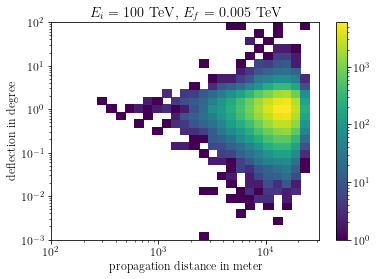

In [24]:
key = 'df_01'

bins = (np.logspace(2, 4.5, 30), np.logspace(-3, 2, 30))
plt.hist2d(df_dict_100[key].distances[df_dict_100[key].E_f > 0.9 * mode(df_dict_100[key].E_f)], 
           df_dict_100[key].deflection[df_dict_100[key].E_f > 0.9 * mode(df_dict_100[key].E_f)],
           bins=bins, cmin=1, norm=mpl.colors.LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.xlabel('propagation distance in meter')
plt.ylabel('deflection in degree')
plt.colorbar()
plt.title(r'$E_i = 100$ TeV, $E_f = {}$ TeV'.format(mode(df_dict_100[key].E_f)/1e3))
print('E_i = 100 TeV, E_f = ', mode(df_dict_100[key].E_f)/1e3, ' TeV')

E_i = 100 TeV, E_f =  1.0  TeV


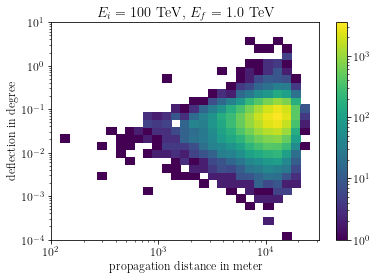

In [25]:
key = 'df_03'

bins = (np.logspace(2, 4.5, 30), np.logspace(-4, 1, 30))
plt.hist2d(df_dict_100[key].distances[df_dict_100[key].E_f > 0.9 * mode(df_dict_100[key].E_f)], 
           df_dict_100[key].deflection[df_dict_100[key].E_f > 0.9 * mode(df_dict_100[key].E_f)],
           bins=bins, cmin=1, norm=mpl.colors.LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.xlabel('propagation distance in meter')
plt.ylabel('deflection in degree')
plt.colorbar()
plt.title(r'$E_i = 100$ TeV, $E_f = {}$ TeV'.format(mode(df_dict_100[key].E_f)/1e3))
print('E_i = 100 TeV, E_f = ', mode(df_dict_100[key].E_f)/1e3, ' TeV')

## deflection as function of energy and distance

In [26]:
df_dict['df_03']

,E_i,E_f,distances,deflection,x_dir_i,y_dir_i,z_dir_i,x_i,y_i,z_i,x_f,y_f,z_f
0,1000000.0,804.044474,16705.590076,0.089600,0.0,0.0,1.0,0.0,0.0,0.0,276.410830,140.761727,1.670559e+06
1,1000000.0,429.053432,16667.627440,0.051016,0.0,0.0,1.0,0.0,0.0,0.0,40.004964,95.991237,1.666763e+06
2,1000000.0,806.975284,22335.080639,0.052130,0.0,0.0,1.0,0.0,0.0,0.0,-133.564637,67.376622,2.233508e+06
3,1000000.0,764.787055,20154.571102,0.070448,0.0,0.0,1.0,0.0,0.0,0.0,-223.335759,51.756591,2.015457e+06
4,1000000.0,662.782782,9186.171147,0.017255,0.0,0.0,1.0,0.0,0.0,0.0,-9.414595,-0.513590,9.186171e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72495,1000000.0,725.297809,13757.593203,0.018465,0.0,0.0,1.0,0.0,0.0,0.0,-38.792698,-3.460359,1.375759e+06
72496,1000000.0,842.812882,21715.326356,0.074449,0.0,0.0,1.0,0.0,0.0,0.0,-25.111527,23.582942,2.171533e+06
72497,1000000.0,101.841855,20054.292608,0.156202,0.0,0.0,1.0,0.0,0.0,0.0,-15.396054,44.026993,2.005429e+06
72498,1000000.0,1000.000000,14222.375519,0.143427,0.0,0.0,1.0,0.0,0.0,0.0,359.194948,-168.324308,1.422237e+06


Text(0, 0.5, 'propagation distance in m')

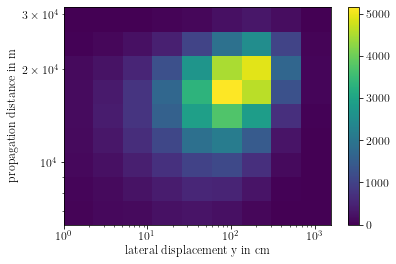

In [132]:
key = 'df_03'


bins = (np.logspace(0, 3.2, 10), np.logspace(3.8, 4.5, 10))
n = plt.hist2d(np.abs(df_dict[key].y_f), df_dict[key].distances, bins=bins) 
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.xlabel('lateral displacement y in cm')
plt.ylabel('propagation distance in m')

In [61]:
print(n[0]) # counts
print(n[1]) # x bins
print(n[2]) # y bins
print(n[3]) # object

[[2.200e+01 3.300e+01 5.700e+01 7.100e+01 7.300e+01 6.800e+01 5.800e+01
  1.700e+01 2.000e+00]
 [5.800e+01 7.200e+01 1.170e+02 1.650e+02 1.860e+02 1.600e+02 1.220e+02
  4.600e+01 5.000e+00]
 [5.400e+01 1.240e+02 2.050e+02 3.500e+02 4.150e+02 3.870e+02 2.550e+02
  1.180e+02 1.200e+01]
 [1.110e+02 1.940e+02 3.680e+02 5.460e+02 7.960e+02 8.130e+02 6.190e+02
  2.320e+02 1.900e+01]
 [1.320e+02 2.780e+02 5.080e+02 9.420e+02 1.450e+03 1.684e+03 1.314e+03
  5.270e+02 4.800e+01]
 [1.090e+02 2.460e+02 5.830e+02 1.079e+03 1.867e+03 2.560e+03 2.313e+03
  9.090e+02 9.400e+01]
 [5.400e+01 1.310e+02 3.470e+02 6.930e+02 1.418e+03 2.302e+03 2.451e+03
  1.238e+03 1.460e+02]
 [4.000e+00 2.200e+01 5.900e+01 1.400e+02 3.230e+02 6.430e+02 8.220e+02
  5.060e+02 8.500e+01]
 [0.000e+00 0.000e+00 1.000e+00 6.000e+00 1.600e+01 3.100e+01 2.800e+01
  2.900e+01 5.000e+00]]
[1.00000000e+00 2.26754313e+00 5.14175183e+00 1.16591440e+01
 2.64376119e+01 5.99484250e+01 1.35935639e+02 3.08239924e+02
 6.98947321e+02 1.5848

10 10
9
(9, 9)


Text(0, 0.5, 'propagation distance in m')

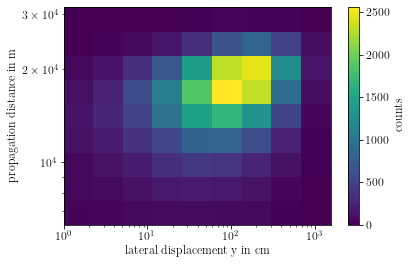

In [104]:
x, y = np.meshgrid(n[1], n[2])
print(len(x), len(y))
z = n[0] # [:-1, :-1]
print(len(z))
print(np.shape(z))

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z)
ax.set_yscale('log')
ax.set_xscale('log')
ax.axis([x.min(), x.max(), y.min(), y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('counts')
plt.xlabel('lateral displacement y in cm')
plt.ylabel('propagation distance in m')

In [74]:
x # displacement

array([[1.00000000e+00, 2.26754313e+00, 5.14175183e+00, 1.16591440e+01,
        2.64376119e+01, 5.99484250e+01, 1.35935639e+02, 3.08239924e+02,
        6.98947321e+02, 1.58489319e+03],
       [1.00000000e+00, 2.26754313e+00, 5.14175183e+00, 1.16591440e+01,
        2.64376119e+01, 5.99484250e+01, 1.35935639e+02, 3.08239924e+02,
        6.98947321e+02, 1.58489319e+03],
       [1.00000000e+00, 2.26754313e+00, 5.14175183e+00, 1.16591440e+01,
        2.64376119e+01, 5.99484250e+01, 1.35935639e+02, 3.08239924e+02,
        6.98947321e+02, 1.58489319e+03],
       [1.00000000e+00, 2.26754313e+00, 5.14175183e+00, 1.16591440e+01,
        2.64376119e+01, 5.99484250e+01, 1.35935639e+02, 3.08239924e+02,
        6.98947321e+02, 1.58489319e+03],
       [1.00000000e+00, 2.26754313e+00, 5.14175183e+00, 1.16591440e+01,
        2.64376119e+01, 5.99484250e+01, 1.35935639e+02, 3.08239924e+02,
        6.98947321e+02, 1.58489319e+03],
       [1.00000000e+00, 2.26754313e+00, 5.14175183e+00, 1.16591440e+01,
   

In [76]:
y # propagations distance

array([[ 6309.5734448 ,  6309.5734448 ,  6309.5734448 ,  6309.5734448 ,
         6309.5734448 ,  6309.5734448 ,  6309.5734448 ,  6309.5734448 ,
         6309.5734448 ,  6309.5734448 ],
       [ 7547.05956697,  7547.05956697,  7547.05956697,  7547.05956697,
         7547.05956697,  7547.05956697,  7547.05956697,  7547.05956697,
         7547.05956697,  7547.05956697],
       [ 9027.25177948,  9027.25177948,  9027.25177948,  9027.25177948,
         9027.25177948,  9027.25177948,  9027.25177948,  9027.25177948,
         9027.25177948,  9027.25177948],
       [10797.75162328, 10797.75162328, 10797.75162328, 10797.75162328,
        10797.75162328, 10797.75162328, 10797.75162328, 10797.75162328,
        10797.75162328, 10797.75162328],
       [12915.49665015, 12915.49665015, 12915.49665015, 12915.49665015,
        12915.49665015, 12915.49665015, 12915.49665015, 12915.49665015,
        12915.49665015, 12915.49665015],
       [15448.59147903, 15448.59147903, 15448.59147903, 15448.59147903,
   

In [133]:
y_uni = np.unique(y)
y_uni

array([ 6309.5734448 ,  7547.05956697,  9027.25177948, 10797.75162328,
       12915.49665015, 15448.59147903, 18478.49797422, 22102.65497971,
       26437.61185749, 31622.77660168])

In [134]:
x_uni = np.unique(x)
x_uni

array([1.00000000e+00, 2.26754313e+00, 5.14175183e+00, 1.16591440e+01,
       2.64376119e+01, 5.99484250e+01, 1.35935639e+02, 3.08239924e+02,
       6.98947321e+02, 1.58489319e+03])

10 10
9
(9, 9)


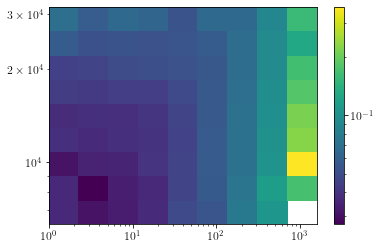

In [128]:
key = 'df_03'

defl_med = []
for i_y in range(len(y_uni)-1):
    defl_med_per_y = []
    for i_x in range(len(x_uni)-1):
        d = df_dict[key].deflection[(np.abs(df_dict[key].y_f) > x_uni[i_x]) & (np.abs(df_dict[key].y_f) < x_uni[i_x+1])
                                  & (df_dict[key].distances > y_uni[i_y]) & (df_dict[key].distances < y_uni[i_y+1])].values
        if len(d) != 0:
            defl_med_per_y.append(np.median(d))
        else:
            defl_med_per_y.append(0)
    defl_med.append(defl_med_per_y)
    
x, y = np.meshgrid(n[1], n[2])
print(len(x), len(y))
z = n[0] # [:-1, :-1]
print(len(z))
print(np.shape(z))

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, defl_med, norm=mpl.colors.LogNorm())
ax.set_yscale('log')
ax.set_xscale('log')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

10 10
9
(9, 9)


Text(0, 0.5, 'propagation distance in m')

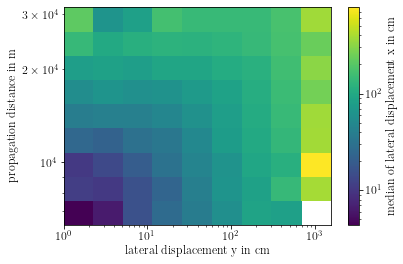

In [141]:
key = 'df_03'

x_dis = []
for i_y in range(len(y_uni)-1):
    x_dis_per_y = []
    for i_x in range(len(x_uni)-1):
        d = df_dict[key].x_f[(np.abs(df_dict[key].y_f) >= x_uni[i_x]) & (np.abs(df_dict[key].y_f) < x_uni[i_x+1])
                                  & (df_dict[key].distances >= y_uni[i_y]) & (df_dict[key].distances < y_uni[i_y+1])].values
        if len(d) != 0:
            x_dis_per_y.append(np.median(np.abs(d)))
        else:
            x_dis_per_y.append(0)
    x_dis.append(x_dis_per_y)
    
x, y = np.meshgrid(n[1], n[2])
print(len(x), len(y))
z = n[0] # [:-1, :-1]
print(len(z))
print(np.shape(z))

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, x_dis, norm=mpl.colors.LogNorm())
ax.set_yscale('log')
ax.set_xscale('log')
ax.axis([x.min(), x.max(), y.min(), y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('median of lateral displacement x in cm')
plt.xlabel('lateral displacement y in cm')
plt.ylabel('propagation distance in m')

100


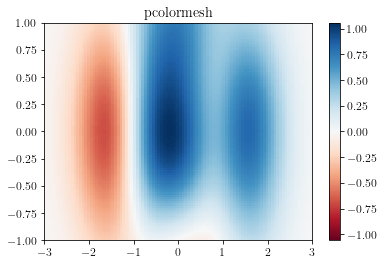

In [142]:
# generate 2 2d grids for the x & y bounds
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-1, 1, 100))
print(len(x))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2) 
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

In [147]:
x

array([[-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
         2.93939394,  3.        ],
       [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
         2.93939394,  3.        ],
       [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
         2.93939394,  3.        ],
       ...,
       [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
         2.93939394,  3.        ],
       [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
         2.93939394,  3.        ],
       [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
         2.93939394,  3.        ]])

In [145]:
x[0]

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [144]:
y

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.97979798, -0.97979798, -0.97979798, ..., -0.97979798,
        -0.97979798, -0.97979798],
       [-0.95959596, -0.95959596, -0.95959596, ..., -0.95959596,
        -0.95959596, -0.95959596],
       ...,
       [ 0.95959596,  0.95959596,  0.95959596, ...,  0.95959596,
         0.95959596,  0.95959596],
       [ 0.97979798,  0.97979798,  0.97979798, ...,  0.97979798,
         0.97979798,  0.97979798],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [146]:
np.shape(x)

(100, 100)

# calculate kinematic angle

In [ ]:
def computeFinalStateAngles(E_total, x, y, M_N):
    '''
    Parameters
    ----------
    E_total: total neutrino energy (E_i = E_total, E_f = E1)
    x: (4 * E_i * E_f * np.sin(theta)**2) / (2 * m_p * (E_i - E_f)) (Bjorken)
    y: expected energy transfer (Bjorken)
    M_N: mass of nucleon
    '''
    muon_mass = 105.66 / 1e3
    theta1 = 0
    theta2 = 0
    m1 = muon_mass
    E1 = (1 - y) * E_total
    kE1sq = E1**2 - m1**2
    cos_theta1 = (E1 - x*y*M_N - (m1**2)/2 * E_total) / np.sqrt(kE1sq)
    kE1 = np.sqrt(kE1sq)
    theta1 = np.arccos(cos_theta1)
    p_long = E_total - kE1*cos_theta1
    p_trans = kE1 * np.sin(theta1)
    theta2 = np.arctan(p_trans/p_long)
    return theta1, theta2

E_total = 1e2 # GeV
# x = 
y = spl_nu(E_total)
# M_N = 
# computeFinalStateAngles(E_total, x, y, M_N)

In [ ]:
def computeScatteringAngleANIS(E_nu, x, y, M_N):
    cos_theta = 1 - x*y*M_N / ((1-y) * E_nu)
    return np.arccos(cos_theta)